# Recommendation system using Weighted average and popularity of item

In [2]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#creating dataframes for the data
credits = pd.read_csv("../../Movie recommendation/Recommender 2/tmdb_5000_credits.csv")
movies = pd.read_csv("../../Movie recommendation/Recommender 2/tmdb_5000_movies.csv")

In [4]:
#viewing the credits data and its shape
print('credits shape:',credits.shape)
credits.head()

credits shape: (4803, 4)


movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [5]:
#viewing the movies data and its shape
print('movies shape:',movies.shape)
movies.head(2)

movies shape: (4803, 20)


budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500

In [6]:
#cleaning the movies data by dropping some columns
#dropping title column since there is an original title column
movies_clean = movies.drop(columns = ['production_countries','status','title','tagline'])
movies_clean.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   

   runtime                                   spoken_languages  vote_average  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...           7.2   
1    169.0           [{"iso_639_1": "en", "name": "English"}]           6.9   

   vote_count  
0       11800  
1        4500

In [7]:
#renaming the id column in movies_clean data
movies_clean = movies_clean.rename(columns={'id': 'movie_id'})
movies_clean.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage  movie_id  \
0                   http://www.avatarmovie.com/     19995   
1  http://disney.go.com/disneypictures/pirates/       285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   

   runtime                                   spoken_languages  vote_average  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...           7.2   
1    169.0           [{"iso_639_1": "en", "name": "English"}]           6.9   

   vote_count  
0       11800  
1        4500

In [8]:
#merging the movies_clean data and credits data
data = pd.merge(credits,movies_clean, on = 'movie_id')
data.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage  \
0                   http://www.avatarmovie.com/   
1  http://disney.go.com/disneypictures/pirates/   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   

   runtime                                   spoken_languages  vote_average  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...           7.2   
1    169.0           [{"iso_639_1": "en", "name": "English"}]           6.9   

   vote_count  
0       11800  
1        4500

In [9]:
#since there are two title columns, I will be dropping one
data = data.drop(columns=['original_title','crew'])
print('data:',data.shape)
data.head(2)

data: (4803, 17)


movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                cast     budget  \
0  [{"cast_id": 242, "character": "Jake Sully", "...  237000000   
1  [{"cast_id": 4, "character": "Captain Jack Spa...  300000000   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage  \
0                   http://www.avatarmovie.com/   
1  http://disney.go.com/disneypictures/pirates/   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   

   runtime                                   spoken_languages  vote_average  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...           7.2   
1    169.0           [{"iso_639_1": "en", "name": "English"}]           6.9   

   vote_count  
0       11800  
1        4500

In [10]:
data.dtypes

movie_id                  int64
title                    object
cast                     object
budget                    int64
genres                   object
homepage                 object
keywords                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
vote_average            float64
vote_count                int64
dtype: object

In [11]:
#checking for null values
data.isnull().sum()

movie_id                   0
title                      0
cast                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
overview                   3
popularity                 0
production_companies       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
vote_average               0
vote_count                 0
dtype: int64

In [12]:
#replacing the null values on homepage and tagline to space
data['homepage'].fillna("https://yts.rs/", inplace = True)
data.isnull().sum()

movie_id                0
title                   0
cast                    0
budget                  0
genres                  0
homepage                0
keywords                0
original_language       0
overview                3
popularity              0
production_companies    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
vote_average            0
vote_count              0
dtype: int64

In [13]:
#unique values of runtime
data['runtime'].nunique()

156

In [14]:
#getting the number of movies above 2hrs
def length_of_movies():
    short = 0
    long = 0
    for i in data['runtime']:
        if i >= 120:
            long += 1
        else:
            short += 1
    return {"short": short, "long":long}

print(length_of_movies())

{'short': 3730, 'long': 1073}


In [15]:
data_copy = data.copy()
data_copy['runtime'].dropna(inplace = True)
def length_of_movies(x):
    if x >= 120:
        return "long"
    else:
        return "short"

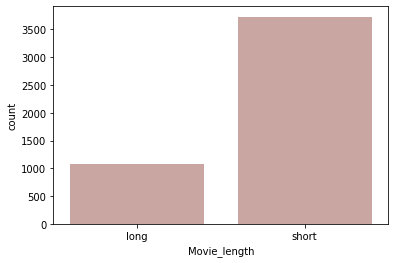

In [16]:
#creating a new lngth feature
data_copy['Movie_length'] = data_copy['runtime'].apply(length_of_movies)
sns.countplot(x ="Movie_length", data=data_copy, color="salmon", saturation=0.3)

From the analysis done we can see that we have more of shorter movies compared to longer ones

# A recommender that recommends the highest rated movies to a user

In [17]:
#finding the weighted average for each movie
V = data['vote_count']                       #number of votes for each movie
R = data['vote_average']                     #average voting/rating for each movie
C = data['vote_average'].mean()              #mean vote across the whole report
m = data['vote_count'].quantile(0.80)        #minimum votes requires to be among the top 250

data['weighted_avg'] = ((R*V)+(C*m))/(V+m)     #used by imdb to calculate weighted average of movies

In [18]:
data.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast     budget  \
0  [{"cast_id": 242, "character": "Jake Sully", "...  237000000   
1  [{"cast_id": 4, "character": "Captain Jack Spa...  300000000   
2  [{"cast_id": 1, "character": "James Bond", "cr...  245000000   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...  250000000   
4  [{"cast_id": 5, "character": "John Carter", "c...  260000000   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage  \
0                   http://www.avatarmovie.com/   
1  http://disney.go.com/disneypictures/pirates/   
2   http://www.sonypictures.com/movies/spectre/   
3            http://www.thedarkknightrises.com/   
4          http://movies.disney.com/john-carter   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   2015-10-26   880674609   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   2012-07-16  1084939099   
4        [{"name": "Walt Disney Pictures", "id": 2}]   2012-03-07   284139100   

   runtime                                   spoken_languages  vote_average  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...           7.2   
1    169.0           [{"iso_639_1": "en", "name": "English"}]           6.9   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...           6.3   
3    165.0           [{"iso_639_1": "en", "name": "English"}]           7.6   
4    132.0           [{"iso_639_1": "en", "name": "English"}]           6.1   

   vote_count  weighted_avg  
0       11800      7.116845  
1        4500      6.758257  
2        4466      6.263305  
3        9106      7.456523  
4        2124      6.097567

In [19]:
#recommending the top 10 movies with the highest weighted average
movie_rank = data.copy()
wavg = movie_rank.sort_values('weighted_avg', ascending = False)
wavg.head(2)

movie_id                     title  \
1881       278  The Shawshank Redemption   
662        550                Fight Club   

                                                   cast    budget  \
1881  [{"cast_id": 3, "character": "Andy Dufresne", ...  25000000   
662   [{"cast_id": 4, "character": "The Narrator", "...  63000000   

                                                 genres  \
1881  [{"id": 18, "name": "Drama"}, {"id": 80, "name...   
662                       [{"id": 18, "name": "Drama"}]   

                                        homepage  \
1881                             https://yts.rs/   
662   http://www.foxmovies.com/movies/fight-club   

                                               keywords original_language  \
1881  [{"id": 378, "name": "prison"}, {"id": 417, "n...                en   
662   [{"id": 825, "name": "support group"}, {"id": ...                en   

                                               overview  popularity  \
1881  Framed in the 1940s for the double murder of h...  136.747729   
662   A ticking-time-bomb insomniac and a slippery s...  146.757391   

                                   production_companies release_date  \
1881  [{"name": "Castle Rock Entertainment", "id": 97}]   1994-09-23   
662   [{"name": "Regency Enterprises", "id": 508}, {...   1999-10-15   

        revenue  runtime                          spoken_languages  \
1881   28341469    142.0  [{"iso_639_1": "en", "name": "English"}]   
662   100853753    139.0  [{"iso_639_1": "en", "name": "English"}]   

      vote_average  vote_count  weighted_avg  
1881           8.5        8205      8.248353  
662            8.3        9413      8.096134

Text(0, 0.5, 'Movie Title')

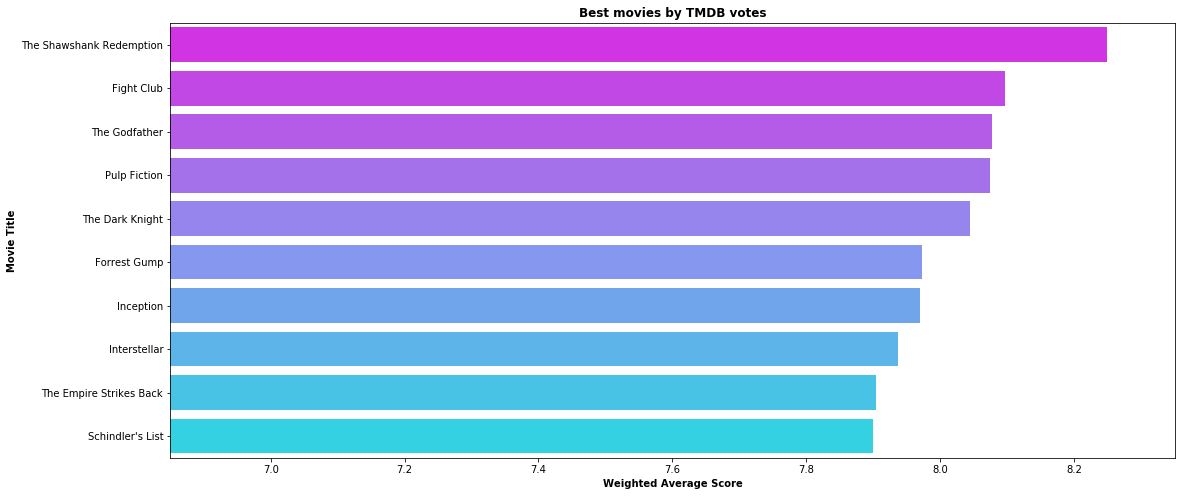

In [20]:
#plotting the top 10 movies according to weighted average
plt.figure(figsize=(18,8))

ax = sns.barplot(x = wavg['weighted_avg'].head(10), y = wavg['title'].head(10), data =wavg, palette='cool_r')

plt.xlim(6.85,8.35)
plt.title('Best movies by TMDB votes', weight = 'bold')
plt.xlabel('Weighted Average Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')

#plt.savefig('best_movies using weighted avg.png')

In [21]:
#recommending the most popular movies
popular = movie_rank.sort_values('popularity', ascending = False)
popular.head(2)

movie_id         title  \
546    211672       Minions   
95     157336  Interstellar   

                                                  cast     budget  \
546  [{"cast_id": 22, "character": "Scarlet Overkil...   74000000   
95   [{"cast_id": 9, "character": "Joseph Cooper", ...  165000000   

                                                genres  \
546  [{"id": 10751, "name": "Family"}, {"id": 16, "...   
95   [{"id": 12, "name": "Adventure"}, {"id": 18, "...   

                              homepage  \
546       http://www.minionsmovie.com/   
95   http://www.interstellarmovie.net/   

                                              keywords original_language  \
546  [{"id": 3487, "name": "assistant"}, {"id": 179...                en   
95   [{"id": 83, "name": "saving the world"}, {"id"...                en   

                                              overview  popularity  \
546  Minions Stuart, Kevin and Bob are recruited by...  875.581305   
95   Interstellar chronicles the adventures of a gr...  724.247784   

                                  production_companies release_date  \
546  [{"name": "Universal Pictures", "id": 33}, {"n...   2015-06-17   
95   [{"name": "Paramount Pictures", "id": 4}, {"na...   2014-11-05   

        revenue  runtime                          spoken_languages  \
546  1156730962     91.0  [{"iso_639_1": "en", "name": "English"}]   
95    675120017    169.0  [{"iso_639_1": "en", "name": "English"}]   

     vote_average  vote_count  weighted_avg  
546           6.4        4571      6.346682  
95            8.1       10867      7.937399

Text(0, 0.5, 'Movie Title')

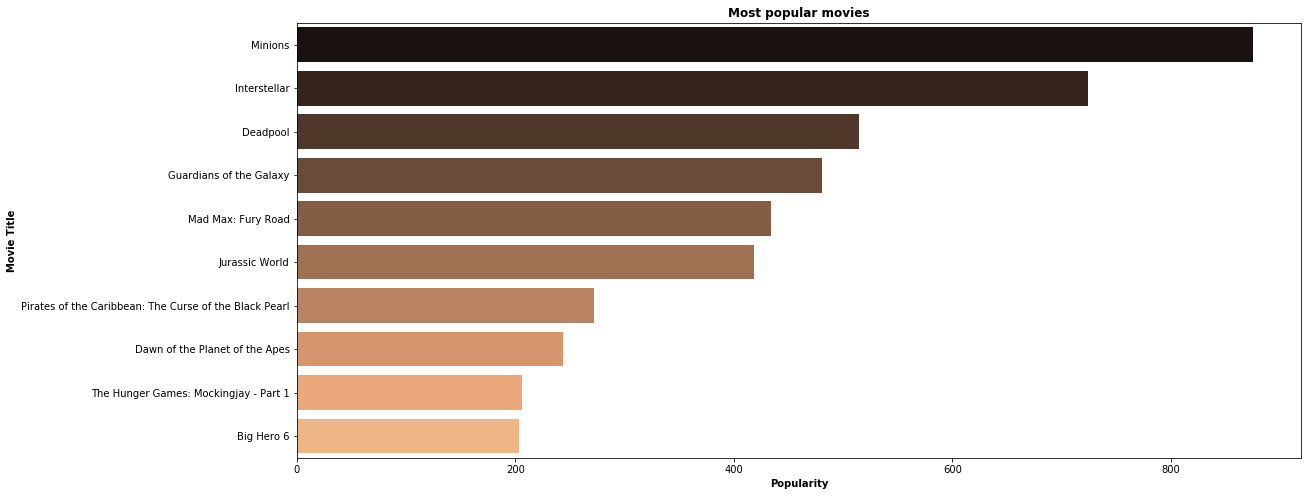

In [22]:
#plotting the most popular movies
plt.figure(figsize=(18,8))

ax = sns.barplot(x = popular['popularity'].head(10), y = popular['title'].head(10), data = popular, palette='copper')

plt.title('Most popular movies', weight = 'bold')
plt.xlabel('Popularity', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')

#plt.savefig('popular_movies.png')

In [23]:
#recommending movies based on weighted average and popularity
#normalizing the weighted average and popularity column

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data[['weighted_avg','popularity']])
data_norm = pd.DataFrame(data_scaled, columns = ['weighted_avg','popularity'])
data_norm.head()

weighted_avg  popularity
0      0.661988    0.171815
1      0.554869    0.158846
2      0.407013    0.122635
3      0.763459    0.128272
4      0.357503    0.050169

In [24]:
#creating a score value that splits scaled weighted_avg and popularity in half
data[['norm_weighted_avg','norm_popularity']] = data_norm
data['score'] = data['norm_weighted_avg']*0.5 + data['norm_popularity']*0.5
data_scored = data.sort_values(['score'], ascending=False)
data_scored.head(2)

movie_id         title  \
95     157336  Interstellar   
546    211672       Minions   

                                                  cast     budget  \
95   [{"cast_id": 9, "character": "Joseph Cooper", ...  165000000   
546  [{"cast_id": 22, "character": "Scarlet Overkil...   74000000   

                                                genres  \
95   [{"id": 12, "name": "Adventure"}, {"id": 18, "...   
546  [{"id": 10751, "name": "Family"}, {"id": 16, "...   

                              homepage  \
95   http://www.interstellarmovie.net/   
546       http://www.minionsmovie.com/   

                                              keywords original_language  \
95   [{"id": 83, "name": "saving the world"}, {"id"...                en   
546  [{"id": 3487, "name": "assistant"}, {"id": 179...                en   

                                              overview  popularity    ...     \
95   Interstellar chronicles the adventures of a gr...  724.247784    ...      
546  Minions Stuart, Kevin and Bob are recruited by...  875.581305    ...      

    release_date     revenue  runtime  \
95    2014-11-05   675120017    169.0   
546   2015-06-17  1156730962     91.0   

                             spoken_languages vote_average  vote_count  \
95   [{"iso_639_1": "en", "name": "English"}]          8.1       10867   
546  [{"iso_639_1": "en", "name": "English"}]          6.4        4571   

     weighted_avg  norm_weighted_avg  norm_popularity     score  
95       7.937399            0.90711         0.827162  0.867136  
546      6.346682            0.43192         1.000000  0.715960  

[2 rows x 21 columns]

In [25]:
#showing the normalized features and the new score  feature
data_scored[['title','norm_weighted_avg','norm_popularity','score']].head(20)

title  norm_weighted_avg  \
95                                         Interstellar           0.907110   
546                                             Minions           0.431920   
94                              Guardians of the Galaxy           0.847604   
788                                            Deadpool           0.715274   
1881                           The Shawshank Redemption           1.000000   
65                                      The Dark Knight           0.939029   
127                                  Mad Max: Fury Road           0.656312   
662                                          Fight Club           0.954528   
3865                                           Whiplash           0.894242   
3337                                      The Godfather           0.948933   
96                                            Inception           0.916636   
3232                                       Pulp Fiction           0.948137   
809                                        Forrest Gump           0.917689   
199   Pirates of the Caribbean: The Curse of the Bla...           0.725743   
329       The Lord of the Rings: The Return of the King           0.892018   
88                                           Big Hero 6           0.797184   
262   The Lord of the Rings: The Fellowship of the Ring           0.869329   
2912                                          Star Wars           0.879926   
2294                                      Spirited Away           0.883785   
1818                                   Schindler's List           0.895961   

      norm_popularity     score  
95           0.827162  0.867136  
546          1.000000  0.715960  
94           0.549462  0.698533  
788          0.587690  0.651482  
1881         0.156179  0.578090  
65           0.213941  0.576485  
127          0.495989  0.576150  
662          0.167611  0.561070  
3865         0.219887  0.557065  
3337         0.164074  0.556503  
96           0.191397  0.554017  
3232         0.138723  0.543430  
809          0.157762  0.537725  
199          0.310620  0.518181  
329          0.141198  0.516608  
88           0.232685  0.514935  
262          0.157666  0.513498  
2912         0.144354  0.512140  
2294         0.135874  0.509829  
1818         0.119314  0.507638

Text(0, 0.5, 'Movie Title')

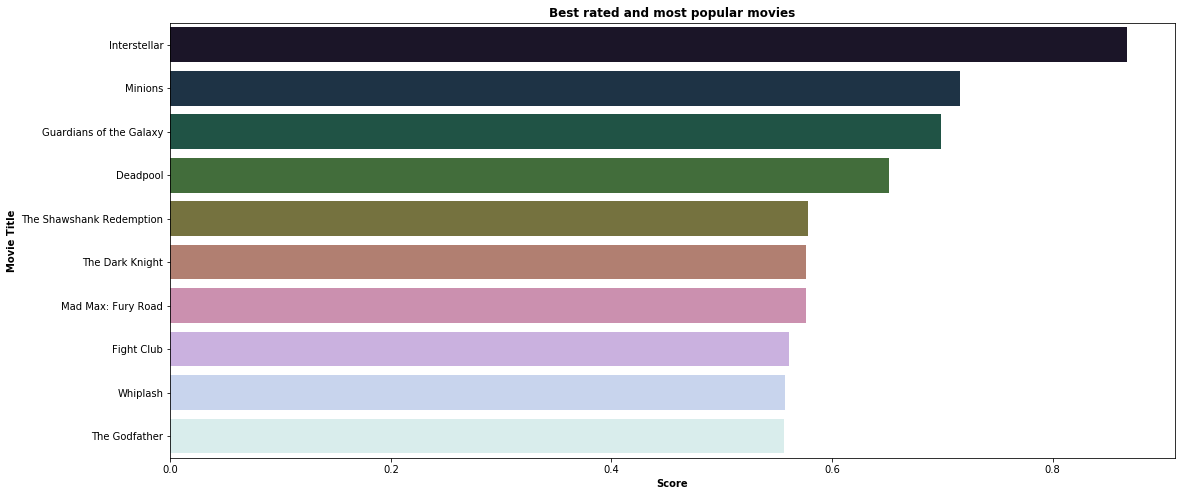

In [26]:
#plotting the top movies according to an even split between weighted avg and popularity

plt.figure(figsize=(18,8))

ax = sns.barplot(x = data_scored['score'].head(10), y = data_scored['title'].head(10), data = data_scored, palette='cubehelix')


plt.title('Best rated and most popular movies', weight = 'bold')
plt.xlabel('Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')

#plt.savefig('scored.png')

# Content-Based Filtering

In [27]:
data.head(3)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   

                                                cast     budget  \
0  [{"cast_id": 242, "character": "Jake Sully", "...  237000000   
1  [{"cast_id": 4, "character": "Captain Jack Spa...  300000000   
2  [{"cast_id": 1, "character": "James Bond", "cr...  245000000   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage  \
0                   http://www.avatarmovie.com/   
1  http://disney.go.com/disneypictures/pirates/   
2   http://www.sonypictures.com/movies/spectre/   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                                            overview  popularity    ...     \
0  In the 22nd century, a paraplegic Marine is di...  150.437577    ...      
1  Captain Barbossa, long believed to be dead, ha...  139.082615    ...      
2  A cryptic message from Bond’s past sends him o...  107.376788    ...      

  release_date     revenue  runtime  \
0   2009-12-10  2787965087    162.0   
1   2007-05-19   961000000    169.0   
2   2015-10-26   880674609    148.0   

                                    spoken_languages vote_average  vote_count  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...          7.2       11800   
1           [{"iso_639_1": "en", "name": "English"}]          6.9        4500   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...          6.3        4466   

   weighted_avg  norm_weighted_avg  norm_popularity     score  
0      7.116845           0.661988         0.171815  0.416901  
1      6.758257           0.554869         0.158846  0.356857  
2      6.263305           0.407013         0.122635  0.264824  

[3 rows x 21 columns]

In [28]:
#obtaining the unique original_languages
data['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

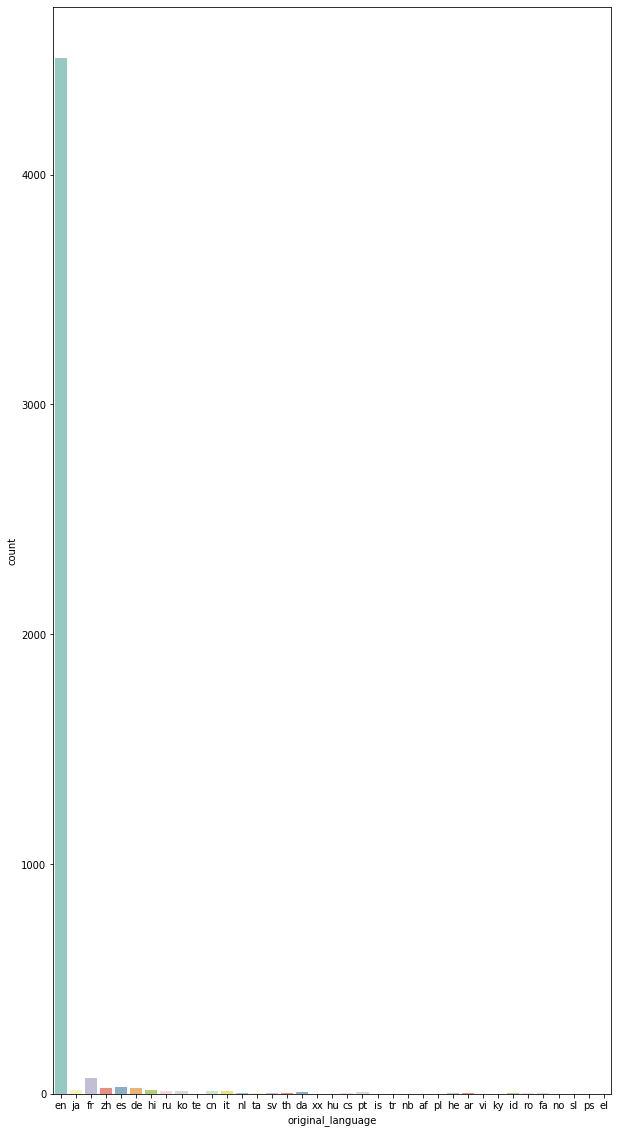

In [29]:
plt.figure(figsize=(10,20))
sns.countplot(x="original_language", data=data, orient="h", palette="Set3")

In [30]:
data["spoken_languages"][0]
data.tail(10)

movie_id                         title  \
4793    182291                On The Downlow   
4794    286939  Sanctuary: Quite a Conundrum   
4795    124606                          Bang   
4796     14337                        Primer   
4797     67238                        Cavite   
4798      9367                   El Mariachi   
4799     72766                     Newlyweds   
4800    231617     Signed, Sealed, Delivered   
4801    126186              Shanghai Calling   
4802     25975             My Date with Drew   

                                                   cast  budget  \
4793  [{"cast_id": 1, "character": "Isaac", "credit_...       0   
4794  [{"cast_id": 3, "character": "Mimi", "credit_i...       0   
4795  [{"cast_id": 2, "character": "The Girl", "cred...       0   
4796  [{"cast_id": 1, "character": "Aaron", "credit_...    7000   
4797                                                 []       0   
4798  [{"cast_id": 1, "character": "El Mariachi", "c...  220000   
4799  [{"cast_id": 1, "character": "Buzzy", "credit_...    9000   
4800  [{"cast_id": 8, "character": "Oliver O\u2019To...       0   
4801  [{"cast_id": 3, "character": "Sam", "credit_id...       0   
4802  [{"cast_id": 3, "character": "Herself", "credi...       0   

                                                 genres  \
4793                      [{"id": 18, "name": "Drama"}]   
4794  [{"id": 53, "name": "Thriller"}, {"id": 27, "n...   
4795                      [{"id": 18, "name": "Drama"}]   
4796  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4797  [{"id": 10769, "name": "Foreign"}, {"id": 53, ...   
4798  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801                                                 []   
4802                [{"id": 99, "name": "Documentary"}]   

                                               homepage  \
4793                                    https://yts.rs/   
4794                                    https://yts.rs/   
4795                                    https://yts.rs/   
4796                         http://www.primermovie.com   
4797                                    https://yts.rs/   
4798                                    https://yts.rs/   
4799                                    https://yts.rs/   
4800  http://www.hallmarkchannel.com/signedsealeddel...   
4801                        http://shanghaicalling.com/   
4802                                    https://yts.rs/   

                                               keywords original_language  \
4793  [{"id": 718, "name": "confession"}, {"id": 100...                en   
4794                                                 []                en   
4795  [{"id": 10726, "name": "gang"}, {"id": 33928, ...                en   
4796  [{"id": 1448, "name": "distrust"}, {"id": 2101...                en   
4797                                                 []                en   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4799                                                 []                en   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                               overview  popularity    ...     \
4793  Isaac and Angel are two young Latinos involved...    0.029757    ...      
4794  It should have been just a normal day of sex, ...    0.166513    ...      
4795  A young woman in L.A. is having a bad day: she...    0.918116    ...      
4796  Friends/fledgling entrepreneurs invent a devic...   23.307949    ...      
4797  Adam, a security guard, travels from Californi...    0.022173    ...      
4798  El Mariachi just wants to play his guitar and ...   14.269792    ...      
4799  A newlywed couple'

In [31]:
#setting index column in the dataframe
data.reset_index(inplace=True)
data.set_index("index", inplace=True)
data.head(3)

movie_id                                     title  \
index                                                       
0         19995                                    Avatar   
1           285  Pirates of the Caribbean: At World's End   
2        206647                                   Spectre   

                                                    cast     budget  \
index                                                                 
0      [{"cast_id": 242, "character": "Jake Sully", "...  237000000   
1      [{"cast_id": 4, "character": "Captain Jack Spa...  300000000   
2      [{"cast_id": 1, "character": "James Bond", "cr...  245000000   

                                                  genres  \
index                                                      
0      [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1      [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2      [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                           homepage  \
index                                                 
0                       http://www.avatarmovie.com/   
1      http://disney.go.com/disneypictures/pirates/   
2       http://www.sonypictures.com/movies/spectre/   

                                                keywords original_language  \
index                                                                        
0      [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1      [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2      [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                                                overview  popularity  \
index                                                                  
0      In the 22nd century, a paraplegic Marine is di...  150.437577   
1      Captain Barbossa, long believed to be dead, ha...  139.082615   
2      A cryptic message from Bond’s past sends him o...  107.376788   

         ...    release_date     revenue  runtime  \
index    ...                                        
0        ...      2009-12-10  2787965087    162.0   
1        ...      2007-05-19   961000000    169.0   
2        ...      2015-10-26   880674609    148.0   

                                        spoken_languages vote_average  \
index                                                                   
0      [{"iso_639_1": "en", "name": "English"}, {"iso...          7.2   
1               [{"iso_639_1": "en", "name": "English"}]          6.9   
2      [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...          6.3   

       vote_count  weighted_avg  norm_weighted_avg  norm_popularity     score  
index                                                                          
0           11800      7.116845           0.661988         0.171815  0.416901  
1            4500      6.758257           0.554869         0.158846  0.356857  
2            4466      6.263305           0.407013         0.122635  0.264824  

[3 rows x 21 columns]

In [32]:
#filling the empty lists in spoken_languages column with their right language
ind = data.index[data["spoken_languages"] == "[]"].tolist()
for i in ind:
    data["spoken_languages"][i] = data['original_language'][i]

C:\Users\JADESOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
#features = ["cast","crew","genres","keywords","spoken_languages"]
features = ["genres","spoken_languages","keywords", "cast"]

In [34]:
#creating the function to remove the characters
import re
def clean_up(x):
    new_s = re.sub(r"[^\sa-zA-Z0-9\.\,\;]","",str(x))
    return new_s

In [35]:
#creating a function to split the particular columns into lists again
def split_columns(x):
    return x.split(',')

In [36]:
def remove_space(x):
    return str(x).replace(" ","")

In [37]:
def desired_output(x):
    b = re.findall(r"\bname\w+",str(x))
    new = []
    for i in b:
        new.append(i[4:])
    return new

In [38]:
for feature in features:
    data[feature] = data[feature].apply(clean_up)
    data[feature] = data[feature].apply(split_columns) 
    data[feature] = data[feature].apply(remove_space)
    data[feature] = data[feature].apply(desired_output)

['nameAction', 'nameAdventure', 'nameFantasy', 'nameScienceFiction']
['nameAction', 'nameAdventure', 'nameFantasy', 'nameScienceFiction']
['nameAction', 'nameAdventure', 'nameFantasy', 'nameScienceFiction']
['nameAction', 'nameAdventure', 'nameFantasy', 'nameScienceFiction']
['nameAdventure', 'nameFantasy', 'nameAction']
['nameAdventure', 'nameFantasy', 'nameAction']
['nameAdventure', 'nameFantasy', 'nameAction']
['nameAction', 'nameAdventure', 'nameCrime']
['nameAction', 'nameAdventure', 'nameCrime']
['nameAction', 'nameAdventure', 'nameCrime']
['nameAction', 'nameCrime', 'nameDrama', 'nameThriller']
['nameAction', 'nameCrime', 'nameDrama', 'nameThriller']
['nameAction', 'nameCrime', 'nameDrama', 'nameThriller']
['nameAction', 'nameCrime', 'nameDrama', 'nameThriller']
['nameAction', 'nameAdventure', 'nameScienceFiction']
['nameAction', 'nameAdventure', 'nameScienceFiction']
['nameAction', 'nameAdventure', 'nameScienceFiction']
['nameFantasy', 'nameAction', 'nameAdventure']
['nameFanta

['nameAction', 'nameThriller', 'nameAdventure']
['nameAction', 'nameThriller', 'nameAdventure']
['nameFantasy', 'nameAnimation', 'nameFamily']
['nameFantasy', 'nameAnimation', 'nameFamily']
['nameFantasy', 'nameAnimation', 'nameFamily']
['nameComedy']
['nameDrama', 'nameAction', 'nameWar', 'nameHistory']
['nameDrama', 'nameAction', 'nameWar', 'nameHistory']
['nameDrama', 'nameAction', 'nameWar', 'nameHistory']
['nameDrama', 'nameAction', 'nameWar', 'nameHistory']
['nameAdventure', 'nameDrama', 'nameAction']
['nameAdventure', 'nameDrama', 'nameAction']
['nameAdventure', 'nameDrama', 'nameAction']
['nameScienceFiction', 'nameAction', 'nameAdventure']
['nameScienceFiction', 'nameAction', 'nameAdventure']
['nameScienceFiction', 'nameAction', 'nameAdventure']
['nameFantasy', 'nameAction']
['nameFantasy', 'nameAction']
['nameFantasy', 'nameAction', 'nameAdventure', 'nameAnimation', 'nameComedy', 'nameFamily']
['nameFantasy', 'nameAction', 'nameAdventure', 'nameAnimation', 'nameComedy', 'name

['nameAction', 'nameThriller']
['nameAction', 'nameThriller']
['nameAction', 'nameCrime', 'nameFantasy']
['nameAction', 'nameCrime', 'nameFantasy']
['nameAction', 'nameCrime', 'nameFantasy']
['nameFamily', 'nameComedy', 'nameFantasy']
['nameFamily', 'nameComedy', 'nameFantasy']
['nameFamily', 'nameComedy', 'nameFantasy']
['nameAction', 'nameAdventure', 'nameScienceFiction', 'nameThriller']
['nameAction', 'nameAdventure', 'nameScienceFiction', 'nameThriller']
['nameAction', 'nameAdventure', 'nameScienceFiction', 'nameThriller']
['nameAction', 'nameAdventure', 'nameScienceFiction', 'nameThriller']
['nameAdventure', 'nameAction', 'nameThriller']
['nameAdventure', 'nameAction', 'nameThriller']
['nameAdventure', 'nameAction', 'nameThriller']
['nameDrama']
['nameAdventure', 'nameFantasy', 'nameAction', 'nameThriller']
['nameAdventure', 'nameFantasy', 'nameAction', 'nameThriller']
['nameAdventure', 'nameFantasy', 'nameAction', 'nameThriller']
['nameAdventure', 'nameFantasy', 'nameAction', 'na

['nameCrime', 'nameThriller']
['nameCrime', 'nameThriller']
['nameAdventure', 'nameFamily', 'nameFantasy']
['nameAdventure', 'nameFamily', 'nameFantasy']
['nameAdventure', 'nameFamily', 'nameFantasy']
['nameAction', 'nameAdventure', 'nameFantasy', 'nameThriller']
['nameAction', 'nameAdventure', 'nameFantasy', 'nameThriller']
['nameAction', 'nameAdventure', 'nameFantasy', 'nameThriller']
['nameAction', 'nameAdventure', 'nameFantasy', 'nameThriller']
['nameAction', 'nameAdventure', 'nameComedy', 'nameCrime', 'nameMystery', 'nameThriller']
['nameAction', 'nameAdventure', 'nameComedy', 'nameCrime', 'nameMystery', 'nameThriller']
['nameAction', 'nameAdventure', 'nameComedy', 'nameCrime', 'nameMystery', 'nameThriller']
['nameAction', 'nameAdventure', 'nameComedy', 'nameCrime', 'nameMystery', 'nameThriller']
['nameAction', 'nameAdventure', 'nameComedy', 'nameCrime', 'nameMystery', 'nameThriller']
['nameAction', 'nameAdventure', 'nameComedy', 'nameCrime', 'nameMystery', 'nameThriller']
['nameT

['nameAnimation', 'nameComedy', 'nameFamily', 'nameFantasy']
['nameAnimation', 'nameComedy', 'nameFamily', 'nameFantasy']
['nameAnimation', 'nameComedy', 'nameFamily', 'nameFantasy']
['nameAction', 'nameComedy', 'nameCrime', 'nameRomance']
['nameAction', 'nameComedy', 'nameCrime', 'nameRomance']
['nameAction', 'nameComedy', 'nameCrime', 'nameRomance']
['nameAction', 'nameComedy', 'nameCrime', 'nameRomance']
['nameAction', 'nameAdventure', 'nameDrama', 'nameRomance']
['nameAction', 'nameAdventure', 'nameDrama', 'nameRomance']
['nameAction', 'nameAdventure', 'nameDrama', 'nameRomance']
['nameAction', 'nameAdventure', 'nameDrama', 'nameRomance']
['nameDrama', 'nameHistory', 'nameRomance']
['nameDrama', 'nameHistory', 'nameRomance']
['nameDrama', 'nameHistory', 'nameRomance']
['nameFantasy', 'nameAction', 'nameDrama']
['nameFantasy', 'nameAction', 'nameDrama']
['nameFantasy', 'nameAction', 'nameDrama']
['nameMystery', 'nameDrama', 'nameThriller', 'nameCrime']
['nameMystery', 'nameDrama', '

['nameAdventure', 'nameAnimation', 'nameDrama', 'nameFamily', 'nameMusic']
['nameComedy', 'nameFamily']
['nameComedy', 'nameFamily']
['nameAction', 'nameComedy', 'nameCrime']
['nameAction', 'nameComedy', 'nameCrime']
['nameAction', 'nameComedy', 'nameCrime']
['nameComedy', 'nameFamily']
['nameComedy', 'nameFamily']
['nameAction', 'nameCrime']
['nameAction', 'nameCrime']
['nameRomance', 'nameComedy']
['nameRomance', 'nameComedy']
['nameAdventure', 'nameAnimation', 'nameComedy', 'nameFamily']
['nameAdventure', 'nameAnimation', 'nameComedy', 'nameFamily']
['nameAdventure', 'nameAnimation', 'nameComedy', 'nameFamily']
['nameAdventure', 'nameAnimation', 'nameComedy', 'nameFamily']
['nameComedy', 'nameRomance']
['nameComedy', 'nameRomance']
['nameAdventure']
['nameComedy']
['nameAction']
['nameDrama']
['nameComedy', 'nameDrama', 'nameRomance', 'nameFantasy']
['nameComedy', 'nameDrama', 'nameRomance', 'nameFantasy']
['nameComedy', 'nameDrama', 'nameRomance', 'nameFantasy']
['nameComedy', 'nam

['nameAction', 'nameAdventure', 'nameFantasy', 'nameScienceFiction']
['nameDrama']
['nameDrama', 'nameThriller']
['nameDrama', 'nameThriller']
['nameAction', 'nameAdventure', 'nameCrime', 'nameThriller']
['nameAction', 'nameAdventure', 'nameCrime', 'nameThriller']
['nameAction', 'nameAdventure', 'nameCrime', 'nameThriller']
['nameAction', 'nameAdventure', 'nameCrime', 'nameThriller']
['nameAnimation', 'nameFamily']
['nameAnimation', 'nameFamily']
['nameDrama', 'nameMusic', 'nameRomance']
['nameDrama', 'nameMusic', 'nameRomance']
['nameDrama', 'nameMusic', 'nameRomance']
['nameMystery', 'nameThriller', 'nameCrime']
['nameMystery', 'nameThriller', 'nameCrime']
['nameMystery', 'nameThriller', 'nameCrime']
['nameCrime', 'nameDrama']
['nameCrime', 'nameDrama']
['nameWar', 'nameDrama', 'nameHistory']
['nameWar', 'nameDrama', 'nameHistory']
['nameWar', 'nameDrama', 'nameHistory']
['nameDrama', 'nameCrime', 'nameThriller']
['nameDrama', 'nameCrime', 'nameThriller']
['nameDrama', 'nameCrime', '

['nameAction', 'nameScienceFiction', 'nameAdventure', 'nameComedy', 'nameFamily']
['nameAction', 'nameScienceFiction', 'nameAdventure', 'nameComedy', 'nameFamily']
['nameAction', 'nameScienceFiction', 'nameAdventure', 'nameComedy', 'nameFamily']
['nameAction', 'nameScienceFiction', 'nameAdventure', 'nameComedy', 'nameFamily']
['nameComedy', 'nameDrama', 'nameFamily', 'nameRomance']
['nameComedy', 'nameDrama', 'nameFamily', 'nameRomance']
['nameComedy', 'nameDrama', 'nameFamily', 'nameRomance']
['nameComedy', 'nameDrama', 'nameFamily', 'nameRomance']
['nameDrama', 'nameMystery', 'nameThriller', 'nameCrime']
['nameDrama', 'nameMystery', 'nameThriller', 'nameCrime']
['nameDrama', 'nameMystery', 'nameThriller', 'nameCrime']
['nameDrama', 'nameMystery', 'nameThriller', 'nameCrime']
['nameDrama', 'nameThriller', 'nameCrime', 'nameMystery']
['nameDrama', 'nameThriller', 'nameCrime', 'nameMystery']
['nameDrama', 'nameThriller', 'nameCrime', 'nameMystery']
['nameDrama', 'nameThriller', 'nameCri

['nameThriller', 'nameCrime', 'nameMystery']
['nameThriller', 'nameCrime', 'nameMystery']
['nameThriller', 'nameCrime', 'nameMystery']
['nameDrama', 'nameMusic']
['nameDrama', 'nameMusic']
['nameComedy']
['nameComedy', 'nameDrama']
['nameComedy', 'nameDrama']
['nameHorror', 'nameMystery']
['nameHorror', 'nameMystery']
['nameComedy', 'nameCrime', 'nameRomance']
['nameComedy', 'nameCrime', 'nameRomance']
['nameComedy', 'nameCrime', 'nameRomance']
['nameDrama', 'nameRomance']
['nameDrama', 'nameRomance']
['nameComedy', 'nameDrama', 'nameRomance']
['nameComedy', 'nameDrama', 'nameRomance']
['nameComedy', 'nameDrama', 'nameRomance']
['nameComedy']
['nameComedy', 'nameWestern']
['nameComedy', 'nameWestern']
['nameAdventure', 'nameFantasy', 'nameAction', 'nameThriller', 'nameScienceFiction']
['nameAdventure', 'nameFantasy', 'nameAction', 'nameThriller', 'nameScienceFiction']
['nameAdventure', 'nameFantasy', 'nameAction', 'nameThriller', 'nameScienceFiction']
['nameAdventure', 'nameFantasy', '

['nameCrime', 'nameDrama', 'nameMystery', 'nameThriller']
['nameCrime', 'nameDrama', 'nameMystery', 'nameThriller']
['nameCrime', 'nameAction', 'nameThriller']
['nameCrime', 'nameAction', 'nameThriller']
['nameCrime', 'nameAction', 'nameThriller']
['nameComedy', 'nameFantasy']
['nameComedy', 'nameFantasy']
['nameCrime', 'nameHistory']
['nameCrime', 'nameHistory']
['nameDrama', 'nameMystery', 'nameScienceFiction', 'nameThriller']
['nameDrama', 'nameMystery', 'nameScienceFiction', 'nameThriller']
['nameDrama', 'nameMystery', 'nameScienceFiction', 'nameThriller']
['nameDrama', 'nameMystery', 'nameScienceFiction', 'nameThriller']
['nameFamily', 'nameFantasy', 'nameComedy']
['nameFamily', 'nameFantasy', 'nameComedy']
['nameFamily', 'nameFantasy', 'nameComedy']
['nameDrama']
['nameThriller', 'nameAction', 'nameMystery']
['nameThriller', 'nameAction', 'nameMystery']
['nameThriller', 'nameAction', 'nameMystery']
['nameAnimation', 'nameFamily', 'nameAdventure']
['nameAnimation', 'nameFamily', '

['nameComedy']
['nameAdventure', 'nameComedy', 'nameCrime']
['nameAdventure', 'nameComedy', 'nameCrime']
['nameAdventure', 'nameComedy', 'nameCrime']
['nameAction', 'nameScienceFiction']
['nameAction', 'nameScienceFiction']
['nameHorror', 'nameComedy', 'nameMusic']
['nameHorror', 'nameComedy', 'nameMusic']
['nameHorror', 'nameComedy', 'nameMusic']
['nameAction', 'nameThriller', 'nameAdventure']
['nameAction', 'nameThriller', 'nameAdventure']
['nameAction', 'nameThriller', 'nameAdventure']
['nameAction', 'nameFantasy', 'nameScienceFiction']
['nameAction', 'nameFantasy', 'nameScienceFiction']
['nameAction', 'nameFantasy', 'nameScienceFiction']
['nameComedy', 'nameRomance', 'nameDrama']
['nameComedy', 'nameRomance', 'nameDrama']
['nameComedy', 'nameRomance', 'nameDrama']
['nameDrama', 'nameHorror']
['nameDrama', 'nameHorror']
['nameMusic']
['nameAction', 'nameAdventure', 'nameCrime', 'nameDrama']
['nameAction', 'nameAdventure', 'nameCrime', 'nameDrama']
['nameAction', 'nameAdventure', 'na

['nameAction', 'nameCrime', 'nameDrama', 'nameWestern']
['nameAction', 'nameCrime', 'nameDrama', 'nameWestern']
['nameDrama', 'nameThriller', 'nameWar']
['nameDrama', 'nameThriller', 'nameWar']
['nameDrama', 'nameThriller', 'nameWar']
['nameComedy']
['nameComedy', 'nameRomance']
['nameComedy', 'nameRomance']
['nameDrama', 'nameThriller', 'nameMystery', 'nameRomance']
['nameDrama', 'nameThriller', 'nameMystery', 'nameRomance']
['nameDrama', 'nameThriller', 'nameMystery', 'nameRomance']
['nameDrama', 'nameThriller', 'nameMystery', 'nameRomance']
['nameCrime', 'nameThriller', 'nameMystery']
['nameCrime', 'nameThriller', 'nameMystery']
['nameCrime', 'nameThriller', 'nameMystery']
['nameComedy']
['nameAction', 'nameFantasy', 'nameScienceFiction']
['nameAction', 'nameFantasy', 'nameScienceFiction']
['nameAction', 'nameFantasy', 'nameScienceFiction']
['nameCrime', 'nameDrama', 'nameThriller']
['nameCrime', 'nameDrama', 'nameThriller']
['nameCrime', 'nameDrama', 'nameThriller']
['nameFantasy',

['nameComedy', 'nameRomance']
['nameComedy', 'nameRomance']
['nameRomance', 'nameScienceFiction', 'nameDrama']
['nameRomance', 'nameScienceFiction', 'nameDrama']
['nameRomance', 'nameScienceFiction', 'nameDrama']
['nameMystery', 'nameThriller', 'nameDrama']
['nameMystery', 'nameThriller', 'nameDrama']
['nameMystery', 'nameThriller', 'nameDrama']
['nameFantasy', 'nameAdventure', 'nameFamily']
['nameFantasy', 'nameAdventure', 'nameFamily']
['nameFantasy', 'nameAdventure', 'nameFamily']
['nameDrama', 'nameComedy', 'nameRomance']
['nameDrama', 'nameComedy', 'nameRomance']
['nameDrama', 'nameComedy', 'nameRomance']
['nameAction', 'nameComedy']
['nameAction', 'nameComedy']
['nameAction', 'nameThriller']
['nameAction', 'nameThriller']
['nameAdventure', 'nameThriller']
['nameAdventure', 'nameThriller']
['nameDrama']
['nameDrama', 'nameFamily']
['nameDrama', 'nameFamily']
['nameDrama']
['nameAction', 'nameThriller']
['nameAction', 'nameThriller']
['nameHistory', 'nameDrama', 'nameThriller', 'na

['nameAdventure', 'nameComedy', 'nameFamily']
['nameAdventure', 'nameComedy', 'nameFamily']
['nameDrama']
['nameDrama', 'nameCrime', 'nameThriller']
['nameDrama', 'nameCrime', 'nameThriller']
['nameDrama', 'nameCrime', 'nameThriller']
['nameAction', 'nameDrama', 'nameThriller']
['nameAction', 'nameDrama', 'nameThriller']
['nameAction', 'nameDrama', 'nameThriller']
['nameComedy', 'nameRomance']
['nameComedy', 'nameRomance']
['nameDrama', 'nameComedy', 'nameRomance', 'nameFamily']
['nameDrama', 'nameComedy', 'nameRomance', 'nameFamily']
['nameDrama', 'nameComedy', 'nameRomance', 'nameFamily']
['nameDrama', 'nameComedy', 'nameRomance', 'nameFamily']
['nameDocumentary']
['nameDrama', 'nameHistory']
['nameDrama', 'nameHistory']
['nameCrime', 'nameDrama', 'nameMystery']
['nameCrime', 'nameDrama', 'nameMystery']
['nameCrime', 'nameDrama', 'nameMystery']
['nameAction', 'nameComedy']
['nameAction', 'nameComedy']
['nameAction', 'nameCrime', 'nameDrama', 'nameThriller']
['nameAction', 'nameCrime'

['nameRomance', 'nameScienceFiction', 'nameHorror', 'nameAction', 'nameCrime']
['nameRomance', 'nameScienceFiction', 'nameHorror', 'nameAction', 'nameCrime']
['nameRomance', 'nameScienceFiction', 'nameHorror', 'nameAction', 'nameCrime']
['nameDrama', 'nameMystery', 'nameThriller']
['nameDrama', 'nameMystery', 'nameThriller']
['nameDrama', 'nameMystery', 'nameThriller']
['nameMusic']
['nameDrama']
['nameCrime', 'nameDrama', 'nameThriller', 'nameHistory']
['nameCrime', 'nameDrama', 'nameThriller', 'nameHistory']
['nameCrime', 'nameDrama', 'nameThriller', 'nameHistory']
['nameCrime', 'nameDrama', 'nameThriller', 'nameHistory']
['nameThriller', 'nameDrama']
['nameThriller', 'nameDrama']
['nameWestern', 'nameAction', 'nameDrama', 'nameHistory']
['nameWestern', 'nameAction', 'nameDrama', 'nameHistory']
['nameWestern', 'nameAction', 'nameDrama', 'nameHistory']
['nameWestern', 'nameAction', 'nameDrama', 'nameHistory']
['nameHorror', 'nameScienceFiction']
['nameHorror', 'nameScienceFiction']
['

['nameFantasy', 'nameDrama', 'nameHorror', 'nameAction', 'nameThriller']
['nameFantasy', 'nameDrama', 'nameHorror', 'nameAction', 'nameThriller']
['nameCrime', 'nameThriller']
['nameCrime', 'nameThriller']
['nameThriller']
['nameComedy']
['nameAdventure', 'nameAnimation', 'nameComedy', 'nameScienceFiction', 'nameFamily']
['nameAdventure', 'nameAnimation', 'nameComedy', 'nameScienceFiction', 'nameFamily']
['nameAdventure', 'nameAnimation', 'nameComedy', 'nameScienceFiction', 'nameFamily']
['nameAdventure', 'nameAnimation', 'nameComedy', 'nameScienceFiction', 'nameFamily']
['nameAdventure', 'nameAnimation', 'nameComedy', 'nameScienceFiction', 'nameFamily']
['nameMusic', 'nameDocumentary']
['nameMusic', 'nameDocumentary']
['nameAction', 'nameFantasy', 'nameScienceFiction']
['nameAction', 'nameFantasy', 'nameScienceFiction']
['nameAction', 'nameFantasy', 'nameScienceFiction']
['nameCrime', 'nameDrama', 'nameMusic']
['nameCrime', 'nameDrama', 'nameMusic']
['nameCrime', 'nameDrama', 'nameMus

['nameRomance', 'nameScienceFiction']
['nameCrime', 'nameDrama', 'nameMystery']
['nameCrime', 'nameDrama', 'nameMystery']
['nameCrime', 'nameDrama', 'nameMystery']
['nameCrime', 'nameDrama', 'nameThriller']
['nameCrime', 'nameDrama', 'nameThriller']
['nameCrime', 'nameDrama', 'nameThriller']
['nameDrama', 'nameFantasy', 'nameHorror', 'nameThriller']
['nameDrama', 'nameFantasy', 'nameHorror', 'nameThriller']
['nameDrama', 'nameFantasy', 'nameHorror', 'nameThriller']
['nameDrama', 'nameFantasy', 'nameHorror', 'nameThriller']
['nameHorror', 'nameMystery', 'nameThriller']
['nameHorror', 'nameMystery', 'nameThriller']
['nameHorror', 'nameMystery', 'nameThriller']
['nameAdventure', 'nameDrama', 'nameRomance']
['nameAdventure', 'nameDrama', 'nameRomance']
['nameAdventure', 'nameDrama', 'nameRomance']
['nameComedy', 'nameRomance', 'nameDrama']
['nameComedy', 'nameRomance', 'nameDrama']
['nameComedy', 'nameRomance', 'nameDrama']
['nameWar', 'nameDrama']
['nameWar', 'nameDrama']
['nameDrama', 'n

['nameHorror', 'nameThriller']
['nameAdventure', 'nameComedy', 'nameScienceFiction']
['nameAdventure', 'nameComedy', 'nameScienceFiction']
['nameAdventure', 'nameComedy', 'nameScienceFiction']
['nameDrama', 'nameFamily', 'nameMusic']
['nameDrama', 'nameFamily', 'nameMusic']
['nameDrama', 'nameFamily', 'nameMusic']
['nameDrama', 'nameComedy']
['nameDrama', 'nameComedy']
['nameScienceFiction', 'nameAnimation', 'nameComedy', 'nameFamily']
['nameScienceFiction', 'nameAnimation', 'nameComedy', 'nameFamily']
['nameScienceFiction', 'nameAnimation', 'nameComedy', 'nameFamily']
['nameScienceFiction', 'nameAnimation', 'nameComedy', 'nameFamily']
['nameAction', 'nameAdventure', 'nameScienceFiction']
['nameAction', 'nameAdventure', 'nameScienceFiction']
['nameAction', 'nameAdventure', 'nameScienceFiction']
['nameAction', 'nameAdventure', 'nameThriller']
['nameAction', 'nameAdventure', 'nameThriller']
['nameAction', 'nameAdventure', 'nameThriller']
['nameHorror', 'nameMystery', 'nameThriller']
['na

['nameCrime', 'nameDrama', 'nameHistory', 'nameWar']
['nameCrime', 'nameDrama', 'nameHistory', 'nameWar']
['nameComedy', 'nameRomance']
['nameComedy', 'nameRomance']
['nameThriller', 'nameMystery', 'nameCrime', 'nameDrama']
['nameThriller', 'nameMystery', 'nameCrime', 'nameDrama']
['nameThriller', 'nameMystery', 'nameCrime', 'nameDrama']
['nameThriller', 'nameMystery', 'nameCrime', 'nameDrama']
['nameDrama', 'nameRomance']
['nameDrama', 'nameRomance']
['nameDrama', 'nameRomance']
['nameDrama', 'nameRomance']
['nameAdventure', 'nameComedy']
['nameAdventure', 'nameComedy']
['nameAnimation', 'nameScienceFiction']
['nameAnimation', 'nameScienceFiction']
['nameThriller', 'nameMystery', 'nameScienceFiction']
['nameThriller', 'nameMystery', 'nameScienceFiction']
['nameThriller', 'nameMystery', 'nameScienceFiction']
['nameDrama', 'nameHistory', 'nameWar']
['nameDrama', 'nameHistory', 'nameWar']
['nameDrama', 'nameHistory', 'nameWar']
['nameDrama']
['nameThriller', 'nameCrime', 'nameMystery']
[

['nameHorror', 'nameThriller']
['nameAnimation', 'nameFantasy']
['nameAnimation', 'nameFantasy']
['nameFamily', 'nameAnimation', 'nameComedy', 'nameAdventure']
['nameFamily', 'nameAnimation', 'nameComedy', 'nameAdventure']
['nameFamily', 'nameAnimation', 'nameComedy', 'nameAdventure']
['nameFamily', 'nameAnimation', 'nameComedy', 'nameAdventure']
['nameRomance', 'nameWestern']
['nameRomance', 'nameWestern']
['nameAdventure', 'nameScienceFiction']
['nameAdventure', 'nameScienceFiction']
['nameComedy', 'nameDrama']
['nameComedy', 'nameDrama']
['nameComedy', 'nameDrama', 'nameFamily', 'nameMusic']
['nameComedy', 'nameDrama', 'nameFamily', 'nameMusic']
['nameComedy', 'nameDrama', 'nameFamily', 'nameMusic']
['nameComedy', 'nameDrama', 'nameFamily', 'nameMusic']
['nameDrama', 'nameRomance']
['nameDrama', 'nameRomance']
['nameThriller', 'nameCrime', 'nameDrama']
['nameThriller', 'nameCrime', 'nameDrama']
['nameThriller', 'nameCrime', 'nameDrama']
['nameDrama', 'nameHistory', 'nameRomance']
['

['nameScienceFiction', 'nameDrama']
['nameScienceFiction', 'nameDrama']
['nameComedy']
['nameDocumentary']
['nameDrama']
['nameDrama', 'nameHistory']
['nameDrama', 'nameHistory']
['nameComedy', 'nameDrama']
['nameComedy', 'nameDrama']
['nameComedy', 'nameHorror', 'nameScienceFiction']
['nameComedy', 'nameHorror', 'nameScienceFiction']
['nameComedy', 'nameHorror', 'nameScienceFiction']
['nameDrama', 'nameFantasy']
['nameDrama', 'nameFantasy']
['nameDrama']
['nameComedy', 'nameDrama', 'nameRomance']
['nameComedy', 'nameDrama', 'nameRomance']
['nameComedy', 'nameDrama', 'nameRomance']
['nameComedy', 'nameCrime', 'nameMystery', 'nameThriller']
['nameComedy', 'nameCrime', 'nameMystery', 'nameThriller']
['nameComedy', 'nameCrime', 'nameMystery', 'nameThriller']
['nameComedy', 'nameCrime', 'nameMystery', 'nameThriller']
['nameThriller', 'nameDrama']
['nameThriller', 'nameDrama']
['nameDrama', 'nameCrime']
['nameDrama', 'nameCrime']
['nameThriller', 'nameCrime', 'nameDrama', 'nameMystery']
['n

['nameFantasy', 'nameHorror']
['nameComedy', 'nameRomance']
['nameComedy', 'nameRomance']
['nameComedy', 'nameDrama']
['nameComedy', 'nameDrama']
['nameAction']
['nameCrime', 'nameAction']
['nameCrime', 'nameAction']
['nameCrime', 'nameDrama', 'nameMystery', 'nameThriller']
['nameCrime', 'nameDrama', 'nameMystery', 'nameThriller']
['nameCrime', 'nameDrama', 'nameMystery', 'nameThriller']
['nameCrime', 'nameDrama', 'nameMystery', 'nameThriller']
['nameAction', 'nameCrime', 'nameComedy', 'nameThriller']
['nameAction', 'nameCrime', 'nameComedy', 'nameThriller']
['nameAction', 'nameCrime', 'nameComedy', 'nameThriller']
['nameAction', 'nameCrime', 'nameComedy', 'nameThriller']
['nameDrama']
['nameHorror', 'nameThriller', 'nameMystery']
['nameHorror', 'nameThriller', 'nameMystery']
['nameHorror', 'nameThriller', 'nameMystery']
['nameAction', 'nameAnimation']
['nameAction', 'nameAnimation']
['nameDocumentary']
['nameAction', 'nameAdventure', 'nameDrama', 'nameFantasy']
['nameAction', 'nameAdv

['nameAction', 'nameThriller', 'nameAdventure']
['nameAction', 'nameThriller', 'nameAdventure']
['nameComedy', 'nameHorror', 'nameAction']
['nameComedy', 'nameHorror', 'nameAction']
['nameComedy', 'nameHorror', 'nameAction']
['nameComedy', 'nameRomance', 'nameScienceFiction']
['nameComedy', 'nameRomance', 'nameScienceFiction']
['nameComedy', 'nameRomance', 'nameScienceFiction']
['nameHorror', 'nameThriller']
['nameHorror', 'nameThriller']
['nameComedy']
['nameCrime', 'nameDrama']
['nameCrime', 'nameDrama']
['nameAdventure', 'nameAction', 'nameThriller', 'nameScienceFiction']
['nameAdventure', 'nameAction', 'nameThriller', 'nameScienceFiction']
['nameAdventure', 'nameAction', 'nameThriller', 'nameScienceFiction']
['nameAdventure', 'nameAction', 'nameThriller', 'nameScienceFiction']
['nameAction', 'nameComedy']
['nameAction', 'nameComedy']
['nameCrime', 'nameDrama']
['nameCrime', 'nameDrama']
['nameHorror', 'nameMystery']
['nameHorror', 'nameMystery']
['nameDrama', 'nameThriller']
['name

['nameDrama', 'nameFamily', 'nameFantasy']
['nameWestern']
['nameDrama']
['nameDrama', 'nameComedy']
['nameDrama', 'nameComedy']
['nameComedy', 'nameMusic']
['nameComedy', 'nameMusic']
['nameDocumentary']
['nameComedy']
['nameDrama', 'nameRomance']
['nameDrama', 'nameRomance']
['nameDrama', 'nameComedy']
['nameDrama', 'nameComedy']
['nameCrime', 'nameComedy', 'nameDrama', 'nameAdventure']
['nameCrime', 'nameComedy', 'nameDrama', 'nameAdventure']
['nameCrime', 'nameComedy', 'nameDrama', 'nameAdventure']
['nameCrime', 'nameComedy', 'nameDrama', 'nameAdventure']
['nameComedy']
['nameAction', 'nameAdventure', 'nameDrama', 'nameWar']
['nameAction', 'nameAdventure', 'nameDrama', 'nameWar']
['nameAction', 'nameAdventure', 'nameDrama', 'nameWar']
['nameAction', 'nameAdventure', 'nameDrama', 'nameWar']
['nameThriller', 'nameHorror']
['nameThriller', 'nameHorror']
['nameAction', 'nameAdventure', 'nameComedy']
['nameAction', 'nameAdventure', 'nameComedy']
['nameAction', 'nameAdventure', 'nameCome

['nameDrama']
['nameAction', 'nameDrama', 'nameThriller']
['nameAction', 'nameDrama', 'nameThriller']
['nameAction', 'nameDrama', 'nameThriller']
['nameDrama', 'nameRomance']
['nameDrama', 'nameRomance']
['nameHorror', 'nameComedy']
['nameHorror', 'nameComedy']
['nameAction', 'nameThriller', 'nameMystery']
['nameAction', 'nameThriller', 'nameMystery']
['nameAction', 'nameThriller', 'nameMystery']
['nameMystery', 'nameScienceFiction', 'nameThriller']
['nameMystery', 'nameScienceFiction', 'nameThriller']
['nameMystery', 'nameScienceFiction', 'nameThriller']
['nameCrime', 'nameDrama']
['nameCrime', 'nameDrama']
['nameRomance', 'nameAction']
['nameRomance', 'nameAction']
['nameMusic', 'nameHorror']
['nameMusic', 'nameHorror']
['nameThriller', 'nameComedy', 'nameMystery']
['nameThriller', 'nameComedy', 'nameMystery']
['nameThriller', 'nameComedy', 'nameMystery']
['nameFamily']
['nameDocumentary']
['nameScienceFiction', 'nameAction', 'nameComedy', 'nameHorror']
['nameScienceFiction', 'nameAc

['nameFranu00e7ais', 'nameEnglish', 'nameEspau00f1ol', 'nameItaliano', 'nameDeutsch']
['nameFranu00e7ais', 'nameEnglish', 'nameEspau00f1ol', 'nameItaliano', 'nameDeutsch']
['nameFranu00e7ais', 'nameEnglish', 'nameEspau00f1ol', 'nameItaliano', 'nameDeutsch']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch']
['nameEnglish', 'nameEspau00f1ol', 'nameItaliano', 'nameFranu00e7ais', 'nameDeutsch']
['nameEnglish', 'nameEspau00f1ol', 'nameItaliano', 'nameFranu00e7ais', 'nameDeutsch']
['nameEnglish', 'nameEspau00f1ol', 'nameItaliano', 'nameFranu00e7ais', 'nameDeutsch']
['nameEnglish', 'nameEspau00f1ol', 'nameItaliano', 'nameFranu00e7ais', 'nameDeutsch']
['nameEnglish', 'nameEspau00f1ol', 'nameItaliano', 'nameFranu00e7ais', 'nameD

['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameu0627u0644u0639u0631u0628u064au0629']
['nameEnglish', 'nameu0627u0644u0639u0631u0628u064au0629']
['nameEnglish', 'nameGaeilge', 'nameLatin', 'nameu666eu901au8bdd']
['nameEnglish', 'nameGaeilge', 'nameLatin', 'nameu666eu901au8bdd']
['nameEnglish', 'nameGaeilge', 'nameLatin', 'nameu666eu901au8bdd']
['nameEnglish', 'nameGaeilge', 'nameLatin', 'nameu666eu901au8bdd']
['nameu666eu901au8bdd', 'nameu65e5u672cu8a9e', 'nameEnglish']
['nameu666eu901au8bdd', 'nameu65e5u672cu8a9e', 'nameEnglish']
['nameu666eu901au8bdd', 'nameu65e5u672cu8a9e', 'nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameSomali']
['nameEnglish', 'nameSomali']
['nameEnglish']
['nameEnglish', 'namesvenska', 'nameDeutsch']
['nameEnglish', 'namesvenska', 'nameDeutsch']
['nameEnglish', 'namesvenska', 'nameDeutsch']
['nameEnglish', 'nameu0627u0644u0639u0631u0628u064au0629']
['nameEnglish', 'nameu0627u0644u0639u0631u0628u064au0629']
['nameEnglish']
['nameEnglish']


['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish', 'nameu65e5u672cu8a9e', 'nameu0641u0627u0631u0633u06cc']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish', 'nameu65e5u672cu8a9e', 'nameu0641u0627u0631u0633u06cc']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish', 'nameu65e5u672cu8a9e', 'nameu0641u0627u0631u0633u06cc']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish', 'nameu65e5u672cu8a9e', 'nameu0641u0627u0631u0633u06cc']
['nameEnglish']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameu010cesku00fd', 'nameDeutsch', 'nameEnglish', 'nameFranu00e7ais']
['nameu010cesku00fd', 'nameDeutsch', 'nameEnglish', 'nameFranu00e7ais']
['nameu010cesku00fd', 'nameDeutsch', 'nameEnglish', 'nameFranu00e7ais']
['nameu010cesku00fd', 'nameDeu

['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish', 'nameu0641u0627u0631u0633u06cc', 'nameu0627u0631u062fu0648', 'nameFranu00e7ais', 'nameu666eu901au8bdd']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish', 'nameu0641u0627u0631u0633u06cc', 'nameu0627u0631u062fu0648', 'nameFranu00e7ais', 'nameu666eu901au8bdd']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish']
['nameu5e7fu5ddeu8bddu5ee3u5ddeu8a71', 'nameDeutsch', 'nameEnglish']
['nameu5e7fu5ddeu8bddu5ee3u5ddeu8a71', 'nameDeutsch', 'nameEnglish']
['nameu5e7fu5ddeu8bddu5ee3u5ddeu8a71', 'nameDeutsch', 'nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'namePu0443u0441u0441u043au0438u0439', 'nameSrpski', 'nameBosanski', 'nameHrvatski']
['

['nameEnglish', 'namePu0443u0441u0441u043au0438u0439']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameTiu1ebfngViu1ec7t', 'nameDeutsch']
['nameEnglish', 'nameTiu1ebfngViu1ec7t', 'nameDeutsch']
['nameEnglish', 'nameTiu1ebfngViu1ec7t', 'nameDeutsch']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'namePolski']
['nameEnglish', 'namePolski']
['nameEspau00f1ol', 'nameEnglish']
['nameEspau00f1ol', 'nameEnglish']
['nameEnglish']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish', 'nameItaliano', 'nameu65e5u672cu8a9e', 'namePu0443u0441u0441u043au0438u0439']
['nameEnglish', 'nameItaliano', 'nameu65e5u672cu8a9e', 'namePu0443u0441u0441u043au0438u0439']
['nameEnglish', 'nameItaliano', 'nameu65e5u672cu8a9e', 'namePu0443u0441u0441u043au0438u0439']
['nameEnglish', 'nameItaliano', 'nameu65e5u672cu8a9e', 'namePu0

['nameEnglish']
['nameEspau00f1ol', 'nameEnglish']
['nameEspau00f1ol', 'nameEnglish']
['nameEnglish']
['nameEnglish', 'nameEspau00f1ol', 'nameMagyar', 'nameu010cesku00fd']
['nameEnglish', 'nameEspau00f1ol', 'nameMagyar', 'nameu010cesku00fd']
['nameEnglish', 'nameEspau00f1ol', 'nameMagyar', 'nameu010cesku00fd']
['nameEnglish', 'nameEspau00f1ol', 'nameMagyar', 'nameu010cesku00fd']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameu65e5u672cu8a9e']
['nameEnglish', 'nameu65e5u672cu8a9e']
['nameEnglish']
['nameu010cesku00fd', 'nameEnglish']
['nameu010cesku00fd', 'nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch', 'nameItaliano', 'nameu0627u0644u0639u0631u0628u064au0629', 'nameEspau00f1ol']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch', 'nameItaliano', 'nameu0627u0644u0639u0631u0628u064au0629', 'nameEspau00f1ol']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch', 'nameItaliano

['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais', 'namePu0443u0441u0441u043au0438u0439']
['nameEnglish', 'nameFranu00e7ais', 'namePu0443u0441u0441u043au0438u0439']
['nameEnglish', 'nameFranu00e7ais', 'namePu0443u0441u0441u043au0438u0439']
['nameEnglish']
['nameEnglish']
['nameu65e5u672cu8a9e', 'nameEnglish']
['nameu65e5u672cu8a9e', 'nameEnglish']
['nameEnglish', 'namePortuguu00eas']
['nameEnglish', 'namePortuguu00eas']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEspau00f1ol', 'nameEnglish']
['nameEspau00f1ol', 'nameEnglish']
['nameEnglish']
['nameFranu00e7ais']
['nameEnglish']
['nameu010cesku00fd', 'nameEnglish', 'nameFranu00e7ais', 'namePolski']
['nameu010cesku00fd', 'nameEnglish', 'nameFranu00e7ais', 'namePolski']
['nameu010cesku00fd', 'nameEnglish', 'nameFranu00e7ais', 'namePolski']
['nameu010cesku00fd', 'nameEnglish', 'nameFranu00e7ais', 'nameP

['nameFranu00e7ais']
['nameEnglish', 'nameTu00fcrku00e7e']
['nameEnglish', 'nameTu00fcrku00e7e']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameu666eu901au8bdd']
['nameEnglish']
['nameEnglish']
['nameu0ba4u0baeu0bbfu0bb4u0bcd']
['nameEnglish']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish']
['nameEnglish']
['nameFranu00e7ais', 'nameu666eu901au8bdd', 'nameEnglish']
['nameFranu00e7ais', 'nameu666eu901au8bdd', 'nameEnglish']
['nameFranu00e7ais', 'nameu666eu901au8bdd', 'nameEnglish']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch', 'namesvenska']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch', 'namesvenska']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch', 'namesvenska']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch', 'namesvenska']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameu010cesku00fd', 'nameEnglish', 'nameDeutsch']
['nameu010cesku00fd', 'nameEnglish', 'nameDeutsch']
['nameu010cesku00fd', 'nameEnglish', 'nameDeutsch']
['

['nameEnglish']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEspau00f1ol', 'nameEnglish']
['nameEspau00f1ol', 'nameEnglish']
['nameEnglish', 'namePolski']
['nameEnglish', 'namePolski']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais', 'nameu666eu901au8bdd', 'namePu0443u0441u0441u043au0438u0439', 'nameEspau00f1ol']
['nameEnglish', 'nameFranu00e7ais', 'nameu666eu901au8bdd', 'namePu0443u0441u0441u043au0438u0439', 'nameEspau00f1ol']
['nameEnglish', 'nameFranu00e7ais', 'nameu666eu901au8bdd', 'namePu0443u0441u0441u043au0438u0439', 'nameEspau00f1ol']
['nameEnglish', 'nameFranu00e7ais', 'nameu666eu901au8bdd', 'namePu0443u0441u0441u043au0438u0439', 'nameEspau00f1ol']
['nameEnglish', 'nameFranu00e7ais', 'nameu66

['nameEnglish']
['nameEnglish', 'namePu0443u0441u0441u043au0438u0439']
['nameEnglish', 'namePu0443u0441u0441u043au0438u0439']
['nameDeutsch']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameu0939u093fu0928u094du0926u0940']
['nameEnglish', 'nameu0939u093fu0928u094du0926u0940']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'namePu0443u0441u0441u043au0438u0439']
['nameEnglish', 'namePu0443u0441u0441u043au0438u0439']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameu0939u093fu0928u094du0926u0940']
['nameEnglish']
['nameEspau00f1ol', 'nameEnglish']
['nameEspau00f1ol', 'nameEnglish']
['nameFranu00e7ais']
['nameEnglish']
['nameEnglish', 'nameItaliano']
['nameEnglish', 'nameItaliano']
['nameEnglish']
['nameEnglish', 'namePu0443u0441u0441u043au0438u0439', 'namePolski']
['nameEnglish', 'namePu0443u0441u0441u043au0438u0439', 'namePolski']
['nameEnglish', 'namePu0443u0441u0441u043au0438u0439', 'namePolski']

['nameFranu00e7ais', 'nameEnglish']
['nameu65e5u672cu8a9e']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish']
['nameu666eu901au8bdd']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameDeutsch']
['nameEnglish', 'nameDeutsch']
['nameEnglish', 'nameMagyar', 'namePolski']
['nameEnglish', 'nameMagyar', 'namePolski']
['nameEnglish', 'nameMagyar', 'namePolski']
['nameItaliano', 'nameEnglish']
['nameItaliano', 'nameEnglish']
['nameu5e7fu5ddeu8bddu5ee3u5ddeu8a71', 'nameEnglish']
['nameu5e7fu5ddeu8bddu5ee3u5ddeu8a71', 'nameEnglish']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameFranu00e7ais', 'nameEspau00f1ol']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameFranu00e7ais', 'nameEspau00f1ol']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameFranu00e7ais', 'nameEspau00f1ol']
['nameEnglish']
['nameEnglish', 'namePolski']
['nameEnglish',

['nameEnglish', 'nameFranu00e7ais', 'namePolski']
['nameEnglish', 'nameFranu00e7ais', 'namePolski']
['nameEnglish', 'nameFranu00e7ais', 'namePolski']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['namePortuguu00eas', 'nameEnglish']
['namePortuguu00eas', 'nameEnglish']
['nameEnglish']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish', 'nameRomu00e2nu0103']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish', 'nameRomu00e2nu0103']
['nameu0627u0644u0639u0631u0628u064au0629', 'nameEnglish', 'nameRomu00e2nu0103']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch']
['nameEnglish', 'nameFranu00e7ais', 'nameDeutsch']
['nameEnglish']
['namePolski', 'nameu010cesku00fd']
['namePolski', 'nameu010cesku00fd']
['nameDeutsch', 'nameu03b5u03bbu03bbu03b7u03bdu03b9u03bau03ac']
['nameDeutsch', 'nameu03b5u03bbu03bbu03b7u03bdu03b9u03bau03ac']
['nameEnglish']
['na

['nameEnglish', 'nameu0939u093fu0928u094du0926u0940']
['nameEnglish', 'nameu0939u093fu0928u094du0926u0940']
['nameDeutsch', 'nameLatin']
['nameDeutsch', 'nameLatin']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameDeutsch']
['nameEnglish', 'nameDeutsch']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish', 'nameFranu00e7ais']
['nameEnglish', 'nameEspau00f1ol', 'nameFranu00e7ais']
['nameEnglish', 'nameEspau00f1ol', 'nameFranu00e7ais']
['nameEnglish', 'nameEspau00f1ol', 'nameFranu00e7ais']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameNederlands', 'nameEnglish', 'namePolski']
['nameNederlands', 'nameEnglish', 'namePolski']
['nameNederlands', 'nameEnglish', 'namePolski']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'namePortuguu00eas']
['nameEnglis

['nameEnglish']
['nameFranu00e7ais']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameu0641u0627u0631u0633u06cc']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish', 'nameEspau00f1ol']
['nameEnglish', 'nameEspau00f1ol']
['nameDeutsch']
['nameEspau00f1ol']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameNorsk']
['nameEnglish', 'nameDeutsch']
['nameEnglish', 'nameDeutsch']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['nameEnglish']
['namesvenska', 'nameEnglish']
['namesvenska', 'nameEnglish']
['nameEnglish']
['nameEnglish', 'nameFranu00e7ais', 'nameItaliano', 'nameLatin', 'nameu666eu901au8bdd']
['nameEnglish', 'nameFranu00e7ais', 'nameItaliano', 'nameLatin', 'nameu666eu901au8bdd']
['nameEnglish', 'nameFranu00e7ais', 'nameItaliano', 'nameLatin', 'nameu666eu901au8bdd']
['nameEnglish', 'nameFranu00e7ais', 'nameItaliano', 'nameLatin', 'nameu666eu901au8bdd

['namecultureclash', 'namefuture', 'namespacewar', 'namespacecolony', 'namesociety', 'namespacetravel', 'namefuturistic', 'nameromance', 'namespace', 'namealien', 'nametribe', 'namealienplanet', 'namecgi', 'namemarine', 'namesoldier', 'namebattle', 'nameloveaffair', 'nameantiwar', 'namepowerrelations', 'namemindandsoul', 'name3d']
['namecultureclash', 'namefuture', 'namespacewar', 'namespacecolony', 'namesociety', 'namespacetravel', 'namefuturistic', 'nameromance', 'namespace', 'namealien', 'nametribe', 'namealienplanet', 'namecgi', 'namemarine', 'namesoldier', 'namebattle', 'nameloveaffair', 'nameantiwar', 'namepowerrelations', 'namemindandsoul', 'name3d']
['namecultureclash', 'namefuture', 'namespacewar', 'namespacecolony', 'namesociety', 'namespacetravel', 'namefuturistic', 'nameromance', 'namespace', 'namealien', 'nametribe', 'namealienplanet', 'namecgi', 'namemarine', 'namesoldier', 'namebattle', 'nameloveaffair', 'nameantiwar', 'namepowerrelations', 'namemindandsoul', 'name3d']
[

['namedccomics', 'namevigilante', 'namesuperhero', 'namebasedoncomicbook', 'namerevenge', 'namesuperpowers', 'nameclarkkent', 'namebrucewayne', 'namedcextendeduniverse']
['namedccomics', 'namevigilante', 'namesuperhero', 'namebasedoncomicbook', 'namerevenge', 'namesuperpowers', 'nameclarkkent', 'namebrucewayne', 'namedcextendeduniverse']
['namedccomics', 'namevigilante', 'namesuperhero', 'namebasedoncomicbook', 'namerevenge', 'namesuperpowers', 'nameclarkkent', 'namebrucewayne', 'namedcextendeduniverse']
['namesavingtheworld', 'namedccomics', 'nameinvulnerability', 'namesequel', 'namesuperhero', 'namebasedoncomicbook', 'namekryptonite', 'namesuperpowers', 'namesuperhumanstrength', 'namelexluthor']
['namesavingtheworld', 'namedccomics', 'nameinvulnerability', 'namesequel', 'namesuperhero', 'namebasedoncomicbook', 'namekryptonite', 'namesuperpowers', 'namesuperhumanstrength', 'namelexluthor']
['namesavingtheworld', 'namedccomics', 'nameinvulnerability', 'namesequel', 'namesuperhero', 'na

['nameholiday', 'namebasedonnovel', 'namevictorianengland', 'namemoney', 'namechristmaseve', 'namescrooge', 'namechristmascarol', 'nameghost', 'namelesson', 'namecharlesdickens', 'namechristmas']
['nameholiday', 'namebasedonnovel', 'namevictorianengland', 'namemoney', 'namechristmaseve', 'namescrooge', 'namechristmascarol', 'nameghost', 'namelesson', 'namecharlesdickens', 'namechristmas']
['nameholiday', 'namebasedonnovel', 'namevictorianengland', 'namemoney', 'namechristmaseve', 'namescrooge', 'namechristmascarol', 'nameghost', 'namelesson', 'namecharlesdickens', 'namechristmas']
['nameholiday', 'namebasedonnovel', 'namevictorianengland', 'namemoney', 'namechristmaseve', 'namescrooge', 'namechristmascarol', 'nameghost', 'namelesson', 'namecharlesdickens', 'namechristmas']
['nameholiday', 'namebasedonnovel', 'namevictorianengland', 'namemoney', 'namechristmaseve', 'namescrooge', 'namechristmascarol', 'nameghost', 'namelesson', 'namecharlesdickens', 'namechristmas']
['nameholiday', 'nam

['nameambush', 'namesadness', 'namestage', 'nameliberationofprisoners', 'nameisland', 'nametraitor', 'nameshipwreck', 'nameprince', 'nameship', 'namedonkey', 'namekingdom', 'nametheatreplay', 'nametransformation', 'nameconciliation', 'nametricks', 'nameheirtothethrone', 'nameassault', 'nameboardingschool', 'namecoupdetat', 'nameteacher', 'namebestfriend', 'namedragon', 'namecowardliness', 'namepregnancy', 'namecapture', 'nameduringcreditsstinger']
['nameambush', 'namesadness', 'namestage', 'nameliberationofprisoners', 'nameisland', 'nametraitor', 'nameshipwreck', 'nameprince', 'nameship', 'namedonkey', 'namekingdom', 'nametheatreplay', 'nametransformation', 'nameconciliation', 'nametricks', 'nameheirtothethrone', 'nameassault', 'nameboardingschool', 'namecoupdetat', 'nameteacher', 'namebestfriend', 'namedragon', 'namecowardliness', 'namepregnancy', 'namecapture', 'nameduringcreditsstinger']
['nameambush', 'namesadness', 'namestage', 'nameliberationofprisoners', 'nameisland', 'nametrait

['namefathersonrelationship', 'nameegypt', 'nameintelligence', 'nameadoption', 'nametimetravel', 'nameboy', 'namechildprodigy', 'namefriendship', 'namegrowingup', 'namechildren', 'nametalkinganimal', 'nametalkingdog', 'namedog', 'namefirstlove', 'nameancientegypt', 'nametimetraveler', 'nameduringcreditsstinger', 'namenewschool', 'namegeorgewashington', 'namegags', 'nametrouble', 'nametimeparadox', 'nameprodigy']
['namebrotherbrotherrelationship', 'nameadultery', 'namemythology', 'namebeauty', 'nametrojanwar', 'namebravery', 'namewall', 'namefraud', 'namehostility', 'nameepic', 'nameswordfight', 'namebattlefield', 'nameancientworld', 'namepyre', 'nameancientgreece', 'nametrojanhorse', 'nametrojan', 'namebronzeage', 'namespartagreece', 'namehelenoftroy', 'namehomersiliad']
['namebrotherbrotherrelationship', 'nameadultery', 'namemythology', 'namebeauty', 'nametrojanwar', 'namebravery', 'namewall', 'namefraud', 'namehostility', 'nameepic', 'nameswordfight', 'namebattlefield', 'nameancientw

['namemiami', 'namekukluxklan', 'namecuba', 'nameundercover', 'namemexicanstandoff', 'nameecstasy', 'nameguantu00e1namo', 'nameslaughter', 'nameshootout', 'namegunfight', 'namebromance', 'namegangster', 'nameviolence', 'namefootchase', 'nameinterrogation', 'namecarchase', 'namedruglord', 'nameexplodinghouse', 'namenarcoticscop', 'nameillegaldrugs', 'namedeaagent', 'namebuddycop', 'namecriminalunderworld', 'nameactionhero', 'namehaitiangang', 'nameminefield']
['namemiami', 'namekukluxklan', 'namecuba', 'nameundercover', 'namemexicanstandoff', 'nameecstasy', 'nameguantu00e1namo', 'nameslaughter', 'nameshootout', 'namegunfight', 'namebromance', 'namegangster', 'nameviolence', 'namefootchase', 'nameinterrogation', 'namecarchase', 'namedruglord', 'nameexplodinghouse', 'namenarcoticscop', 'nameillegaldrugs', 'namedeaagent', 'namebuddycop', 'namecriminalunderworld', 'nameactionhero', 'namehaitiangang', 'nameminefield']
['namemiami', 'namekukluxklan', 'namecuba', 'nameundercover', 'namemexican

['namejapan', 'namesamurai', 'namemutant', 'nameworldwari', 'namemarvelcomic', 'namesuperhero', 'namebasedoncomicbook', 'namesuperhuman', 'nameduringcreditsstinger']
['namejapan', 'namesamurai', 'namemutant', 'nameworldwari', 'namemarvelcomic', 'namesuperhero', 'namebasedoncomicbook', 'namesuperhuman', 'nameduringcreditsstinger']
['namejapan', 'namesamurai', 'namemutant', 'nameworldwari', 'namemarvelcomic', 'namesuperhero', 'namebasedoncomicbook', 'namesuperhuman', 'nameduringcreditsstinger']
['namejapan', 'namesamurai', 'namemutant', 'nameworldwari', 'namemarvelcomic', 'namesuperhero', 'namebasedoncomicbook', 'namesuperhuman', 'nameduringcreditsstinger']
['namejapan', 'namesamurai', 'namemutant', 'nameworldwari', 'namemarvelcomic', 'namesuperhero', 'namebasedoncomicbook', 'namesuperhuman', 'nameduringcreditsstinger']
['namejapan', 'namesamurai', 'namemutant', 'nameworldwari', 'namemarvelcomic', 'namesuperhero', 'namebasedoncomicbook', 'namesuperhuman', 'nameduringcreditsstinger']
['na

['namecyborg', 'nameshotgun', 'namepostapocalyptic', 'namedystopia', 'namemoralambiguity', 'namementalinstitution', 'nameviolence', 'namefictionalwar', 'namemorphing', 'namenuclearweapons', 'nameshapeshifter', 'namesavior', 'namecatchphrase']
['namecyborg', 'nameshotgun', 'namepostapocalyptic', 'namedystopia', 'namemoralambiguity', 'namementalinstitution', 'nameviolence', 'namefictionalwar', 'namemorphing', 'namenuclearweapons', 'nameshapeshifter', 'namesavior', 'namecatchphrase']
['namecyborg', 'nameshotgun', 'namepostapocalyptic', 'namedystopia', 'namemoralambiguity', 'namementalinstitution', 'nameviolence', 'namefictionalwar', 'namemorphing', 'namenuclearweapons', 'nameshapeshifter', 'namesavior', 'namecatchphrase']
['namecyborg', 'nameshotgun', 'namepostapocalyptic', 'namedystopia', 'namemoralambiguity', 'namementalinstitution', 'nameviolence', 'namefictionalwar', 'namemorphing', 'namenuclearweapons', 'nameshapeshifter', 'namesavior', 'namecatchphrase']
['namecyborg', 'nameshotgun'

['nameelves', 'nameorcs', 'namemiddleearthtolkien', 'namebasedonnovel', 'namesuspicion', 'namebravery', 'namewar', 'namehonor', 'nametroll', 'namebrutality', 'nameviolence', 'nameghost', 'nameendoftrilogy', 'namequest', 'nameswordandsorcery']
['nameelves', 'nameorcs', 'namemiddleearthtolkien', 'namebasedonnovel', 'namesuspicion', 'namebravery', 'namewar', 'namehonor', 'nametroll', 'namebrutality', 'nameviolence', 'nameghost', 'nameendoftrilogy', 'namequest', 'nameswordandsorcery']
['nameelves', 'nameorcs', 'namemiddleearthtolkien', 'namebasedonnovel', 'namesuspicion', 'namebravery', 'namewar', 'namehonor', 'nametroll', 'namebrutality', 'nameviolence', 'nameghost', 'nameendoftrilogy', 'namequest', 'nameswordandsorcery']
['nameelves', 'nameorcs', 'namemiddleearthtolkien', 'namebasedonnovel', 'namesuspicion', 'namebravery', 'namewar', 'namehonor', 'nametroll', 'namebrutality', 'nameviolence', 'nameghost', 'nameendoftrilogy', 'namequest', 'nameswordandsorcery']
['nameelves', 'nameorcs', 'n

['nameexoticisland', 'namesuicideattempt', 'namevolleyball', 'nameloneliness', 'nameairplanecrash', 'namedesertedisland', 'nametropicalisland', 'namesurvivalskills']
['nameexoticisland', 'namesuicideattempt', 'namevolleyball', 'nameloneliness', 'nameairplanecrash', 'namedesertedisland', 'nametropicalisland', 'namesurvivalskills']
['nameocean', 'namefish', 'namezoo', 'namepenguin', 'nametapdancing', 'namelove', 'namecrush', 'namesnow', 'nameanthropomorphism', 'namesinging', 'nameantarctica', 'namefamily', 'nameduringcreditsstinger']
['nameocean', 'namefish', 'namezoo', 'namepenguin', 'nametapdancing', 'namelove', 'namecrush', 'namesnow', 'nameanthropomorphism', 'namesinging', 'nameantarctica', 'namefamily', 'nameduringcreditsstinger']
['nameocean', 'namefish', 'namezoo', 'namepenguin', 'nametapdancing', 'namelove', 'namecrush', 'namesnow', 'nameanthropomorphism', 'namesinging', 'nameantarctica', 'namefamily', 'nameduringcreditsstinger']
['nameocean', 'namefish', 'namezoo', 'namepenguin'

['nameholiday', 'namecorruption', 'namedoublelife', 'namedccomics', 'namecrimefighter', 'namehallucination', 'namechristmastree', 'namegothamcity', 'namevigilante', 'namesuperhero', 'nameviolence', 'namedarkhero', 'namefictionalcity', 'namesupervillain', 'namesuperpowers', 'namedeformed', 'namebirdcage', 'nameevilcircus', 'namechristmasholiday']
['nameholiday', 'namecorruption', 'namedoublelife', 'namedccomics', 'namecrimefighter', 'namehallucination', 'namechristmastree', 'namegothamcity', 'namevigilante', 'namesuperhero', 'nameviolence', 'namedarkhero', 'namefictionalcity', 'namesupervillain', 'namesuperpowers', 'namedeformed', 'namebirdcage', 'nameevilcircus', 'namechristmasholiday']
['namesquirrel', 'nameeatinganddrinking', 'namevororte', 'namegarden', 'namegrizzlybear', 'nameentrapment', 'namesuburbianidyll', 'namegarbage', 'nameforest', 'nameturtle', 'namehidinginagarbagecontainer', 'nameskunk', 'nameracoon', 'nameanimal']
['namesquirrel', 'nameeatinganddrinking', 'namevororte', 

['namemars', 'namefuture', 'nameastronaut', 'namescience', 'namecatastrophe']
['namemars', 'namefuture', 'nameastronaut', 'namescience', 'namecatastrophe']
['namemars', 'namefuture', 'nameastronaut', 'namescience', 'namecatastrophe']
['namemars', 'namefuture', 'nameastronaut', 'namescience', 'namecatastrophe']
['namemars', 'namefuture', 'nameastronaut', 'namescience', 'namecatastrophe']
['namegrandfathergrandsonrelationship', 'namewretch', 'nametreasurehunt', 'namedisappearance', 'namefamily', 'namefantasyworld']
['namegrandfathergrandsonrelationship', 'namewretch', 'nametreasurehunt', 'namedisappearance', 'namefamily', 'namefantasyworld']
['namegrandfathergrandsonrelationship', 'namewretch', 'nametreasurehunt', 'namedisappearance', 'namefamily', 'namefantasyworld']
['namegrandfathergrandsonrelationship', 'namewretch', 'nametreasurehunt', 'namedisappearance', 'namefamily', 'namefantasyworld']
['namegrandfathergrandsonrelationship', 'namewretch', 'nametreasurehunt', 'namedisappearance',

['namecasino', 'namepoliticalactivism', 'nameboxer', 'namemissionofmurder', 'nameboxingmatch', 'namesuspense', 'namepoliceofficer', 'namewitnesstomurder']
['namecasino', 'namepoliticalactivism', 'nameboxer', 'namemissionofmurder', 'nameboxingmatch', 'namesuspense', 'namepoliceofficer', 'namewitnesstomurder']
['namecasino', 'namepoliticalactivism', 'nameboxer', 'namemissionofmurder', 'nameboxingmatch', 'namesuspense', 'namepoliceofficer', 'namewitnesstomurder']
['namecasino', 'namepoliticalactivism', 'nameboxer', 'namemissionofmurder', 'nameboxingmatch', 'namesuspense', 'namepoliceofficer', 'namewitnesstomurder']
['namecasino', 'namepoliticalactivism', 'nameboxer', 'namemissionofmurder', 'nameboxingmatch', 'namesuspense', 'namepoliceofficer', 'namewitnesstomurder']
['namecasino', 'namepoliticalactivism', 'nameboxer', 'namemissionofmurder', 'nameboxingmatch', 'namesuspense', 'namepoliceofficer', 'namewitnesstomurder']
['namecasino', 'namepoliticalactivism', 'nameboxer', 'namemissionofmur

['namemanager', 'namearena', 'namedystopia', 'namewrestling', 'namesport', 'namerollerskating', 'namemotorcycleracing', 'namerollerskating', 'namefuturesport']
['namemanager', 'namearena', 'namedystopia', 'namewrestling', 'namesport', 'namerollerskating', 'namemotorcycleracing', 'namerollerskating', 'namefuturesport']
['namemanager', 'namearena', 'namedystopia', 'namewrestling', 'namesport', 'namerollerskating', 'namemotorcycleracing', 'namerollerskating', 'namefuturesport']
['namemanager', 'namearena', 'namedystopia', 'namewrestling', 'namesport', 'namerollerskating', 'namemotorcycleracing', 'namerollerskating', 'namefuturesport']
['namemanager', 'namearena', 'namedystopia', 'namewrestling', 'namesport', 'namerollerskating', 'namemotorcycleracing', 'namerollerskating', 'namefuturesport']
['namemanager', 'namearena', 'namedystopia', 'namewrestling', 'namesport', 'namerollerskating', 'namemotorcycleracing', 'namerollerskating', 'namefuturesport']
['namemanager', 'namearena', 'namedystop

['namelifeanddeath', 'namesexualobsession', 'namefreelove', 'nameheterosexual', 'namechristmasparty', 'nameeroticism', 'nameorgy', 'namemaskedball', 'namemarijuana', 'nameillegalprostitution']
['namemusical', 'nameorphan', 'namefosterchild']
['namemusical', 'nameorphan', 'namefosterchild']
['namemusical', 'nameorphan', 'namefosterchild']
['nameseduction', 'nameconman', 'namefemmefatale', 'namedeception', 'namerivalry', 'nameconartist']
['nameseduction', 'nameconman', 'namefemmefatale', 'namedeception', 'namerivalry', 'nameconartist']
['nameseduction', 'nameconman', 'namefemmefatale', 'namedeception', 'namerivalry', 'nameconartist']
['nameseduction', 'nameconman', 'namefemmefatale', 'namedeception', 'namerivalry', 'nameconartist']
['nameseduction', 'nameconman', 'namefemmefatale', 'namedeception', 'namerivalry', 'nameconartist']
['nameseduction', 'nameconman', 'namefemmefatale', 'namedeception', 'namerivalry', 'nameconartist']
['namelovetriangle', 'namefriendship', 'namedating', 'namesu

['namevenice', 'namecalifornia', 'nametrainstation', 'namehelicopter', 'nameaustria', 'namemountains', 'namegold', 'namesubway', 'namehacker', 'namechase', 'namesafe', 'nameremake', 'namecaper', 'namerevenge', 'namemurder', 'nameheist', 'namedoublecrossed', 'namefastcars', 'nameboatchase', 'namelosangeles', 'nameexplosion', 'nameconvict', 'namefatherdaughterrelationship', 'namecarchase', 'nametvnews', 'namehollywoodsign', 'nametelevisionrepair', 'nameminicooper']
['namenewyork', 'nameparishhall', 'nameromanticcomedy', 'namelawyer', 'namebillionaire', 'nameenvironmentallaw']
['namenewyork', 'nameparishhall', 'nameromanticcomedy', 'namelawyer', 'namebillionaire', 'nameenvironmentallaw']
['namenewyork', 'nameparishhall', 'nameromanticcomedy', 'namelawyer', 'namebillionaire', 'nameenvironmentallaw']
['namenewyork', 'nameparishhall', 'nameromanticcomedy', 'namelawyer', 'namebillionaire', 'nameenvironmentallaw']
['namenewyork', 'nameparishhall', 'nameromanticcomedy', 'namelawyer', 'namebilli

['namehotelroom', 'namesandiego', 'namedrugaddiction', 'namestewardess', 'nameoverdose', 'namegroupie', 'namemusicjournalist', 'nameblacksabbath', 'namerock', 'nameconcert', 'nameswimmingpool', 'namebasedontruestory', 'namepromiscuity', 'namecomingofage', 'nameontheroad', 'namedomineeringmother', 'namereconciliation', 'namesemiautobiographical', 'nameinnocencelost', 'namebustrip', 'nameaspiringwriter']
['namehotelroom', 'namesandiego', 'namedrugaddiction', 'namestewardess', 'nameoverdose', 'namegroupie', 'namemusicjournalist', 'nameblacksabbath', 'namerock', 'nameconcert', 'nameswimmingpool', 'namebasedontruestory', 'namepromiscuity', 'namecomingofage', 'nameontheroad', 'namedomineeringmother', 'namereconciliation', 'namesemiautobiographical', 'nameinnocencelost', 'namebustrip', 'nameaspiringwriter']
['namehotelroom', 'namesandiego', 'namedrugaddiction', 'namestewardess', 'nameoverdose', 'namegroupie', 'namemusicjournalist', 'nameblacksabbath', 'namerock', 'nameconcert', 'nameswimmingp

['namehalloween', 'namefriendship', 'namesupernatural', 'nameafterlife', 'namefriends', 'namedanger', 'nameghost', 'namedisorder', 'nameyoungheroes', 'nameimaginary', 'namesupernaturalability', 'namemischievouschildren']
['namehalloween', 'namefriendship', 'namesupernatural', 'nameafterlife', 'namefriends', 'namedanger', 'nameghost', 'namedisorder', 'nameyoungheroes', 'nameimaginary', 'namesupernaturalability', 'namemischievouschildren']
['namehalloween', 'namefriendship', 'namesupernatural', 'nameafterlife', 'namefriends', 'namedanger', 'nameghost', 'namedisorder', 'nameyoungheroes', 'nameimaginary', 'namesupernaturalability', 'namemischievouschildren']
['namehalloween', 'namefriendship', 'namesupernatural', 'nameafterlife', 'namefriends', 'namedanger', 'nameghost', 'namedisorder', 'nameyoungheroes', 'nameimaginary', 'namesupernaturalability', 'namemischievouschildren']
['namecorruption', 'nameassassin', 'namehostage', 'namefbi', 'namehitman', 'namerussian', 'namesecuritycamera', 'nam

['namesuicide', 'namehotelroom', 'namesuicideattempt', 'namenewlove', 'namefuneral', 'nameairplane', 'namelovers', 'namefallinginlove']
['namesuicide', 'namehotelroom', 'namesuicideattempt', 'namenewlove', 'namefuneral', 'nameairplane', 'namelovers', 'namefallinginlove']
['namesuicide', 'namehotelroom', 'namesuicideattempt', 'namenewlove', 'namefuneral', 'nameairplane', 'namelovers', 'namefallinginlove']
['namesuicide', 'namehotelroom', 'namesuicideattempt', 'namenewlove', 'namefuneral', 'nameairplane', 'namelovers', 'namefallinginlove']
['nameroommate', 'nameloveofoneslife', 'namenewlywed']
['nameroommate', 'nameloveofoneslife', 'namenewlywed']
['nameroommate', 'nameloveofoneslife', 'namenewlywed']
['namesavingtheworld', 'namedccomics', 'namesequel', 'namesuperhero', 'namebasedoncomicbook', 'namelossofvirginity', 'namecriminal', 'namesuperpowers', 'namephantomzone', 'namerocketfiredgrenade', 'namecrystalmachine', 'namesuperhumanstrength', 'nameduringcreditsstinger']
['namesavingthewor

['namespacecraft', 'namelaser', 'nameteleportation', 'nametelekinesis', 'namealien', 'namemilitary', 'nameduringcreditsstinger', 'namesupernaturalpower', 'namemountain']
['namespacecraft', 'namelaser', 'nameteleportation', 'nametelekinesis', 'namealien', 'namemilitary', 'nameduringcreditsstinger', 'namesupernaturalpower', 'namemountain']
['namespacecraft', 'namelaser', 'nameteleportation', 'nametelekinesis', 'namealien', 'namemilitary', 'nameduringcreditsstinger', 'namesupernaturalpower', 'namemountain']
['namespacecraft', 'namelaser', 'nameteleportation', 'nametelekinesis', 'namealien', 'namemilitary', 'nameduringcreditsstinger', 'namesupernaturalpower', 'namemountain']
['namedetective', 'namevatican', 'namefascism', 'namesatanism', 'namefascist', 'namedystopia', 'namegovernment', 'namechancellor', 'namerevenge', 'namepersonificationofsatan', 'nametorture', 'namehatred', 'namemaskedvigilante', 'namecatholicism', 'namecatholicpriest', 'namecatholicguilt', 'namejesuit', 'namevengefulspi

['namebasedonnovel', 'nameburningofwitches', 'namepuritan', 'namepregnancy', 'nameperioddrama', 'nameextramaritalaffair']
['namebasedonnovel', 'nameburningofwitches', 'namepuritan', 'namepregnancy', 'nameperioddrama', 'nameextramaritalaffair']
['namebasedonnovel', 'nameburningofwitches', 'namepuritan', 'namepregnancy', 'nameperioddrama', 'nameextramaritalaffair']
['namecia', 'namenuclearscientist', 'nameiraq', 'namepolitician', 'nameduringcreditsstinger']
['namecia', 'namenuclearscientist', 'nameiraq', 'namepolitician', 'nameduringcreditsstinger']
['namecia', 'namenuclearscientist', 'nameiraq', 'namepolitician', 'nameduringcreditsstinger']
['namecia', 'namenuclearscientist', 'nameiraq', 'namepolitician', 'nameduringcreditsstinger']
['namecia', 'namenuclearscientist', 'nameiraq', 'namepolitician', 'nameduringcreditsstinger']
['namebountyhunter', 'namefbi', 'nameweapon', 'namespectacle']
['namebountyhunter', 'namefbi', 'nameweapon', 'namespectacle']
['namebountyhunter', 'namefbi', 'namew

['namemusical', 'namethemuppets', 'namerobot', 'nameoiltycoon', 'namestudiotour', 'nameduringcreditsstinger']
['namesuicide', 'namehero', 'namevampire', 'namebite', 'namefistfight', 'namesupernatural', 'namevampirehunter', 'namesuperhero', 'namerivalry', 'nametragichero', 'namegoodvsevil', 'nameonemanarmy', 'nameextremeviolence', 'namemartialartsmaster', 'namescientist', 'nameviolence', 'namedisarmingsomeone', 'nameblade', 'namemachinegun', 'nameenglishsubtitlesinoriginal', 'namehypodermicneedle', 'namemicroscope', 'namesecretheadquarters', 'namebulletdodging', 'namebullettime', 'namekickedinthegroin', 'namexrayedskeleton', 'namemouthguard', 'nameescapade', 'nameimaginary', 'namedeadly', 'namemasterwarrior', 'namesupernaturalability', 'namefangvamp']
['namesuicide', 'namehero', 'namevampire', 'namebite', 'namefistfight', 'namesupernatural', 'namevampirehunter', 'namesuperhero', 'namerivalry', 'nametragichero', 'namegoodvsevil', 'nameonemanarmy', 'nameextremeviolence', 'namemartialartsm

['nameitaly', 'namelie', 'namemagic', 'namefairy', 'namepinocchio', 'namecarnival', 'namewish', 'nameboy', 'namenose', 'namepuppet', 'nameanimation', 'namepool', 'nameconscience', 'namejackass', 'namefigaro', 'namesneezing', 'nametoycomestolife']
['nameitaly', 'namelie', 'namemagic', 'namefairy', 'namepinocchio', 'namecarnival', 'namewish', 'nameboy', 'namenose', 'namepuppet', 'nameanimation', 'namepool', 'nameconscience', 'namejackass', 'namefigaro', 'namesneezing', 'nametoycomestolife']
['nameitaly', 'namelie', 'namemagic', 'namefairy', 'namepinocchio', 'namecarnival', 'namewish', 'nameboy', 'namenose', 'namepuppet', 'nameanimation', 'namepool', 'nameconscience', 'namejackass', 'namefigaro', 'namesneezing', 'nametoycomestolife']
['nameitaly', 'namelie', 'namemagic', 'namefairy', 'namepinocchio', 'namecarnival', 'namewish', 'nameboy', 'namenose', 'namepuppet', 'nameanimation', 'namepool', 'nameconscience', 'namejackass', 'namefigaro', 'namesneezing', 'nametoycomestolife']
['nameitaly'

['namehacker', 'namehacking', 'namecreator', 'namefratparty', 'namesocialnetwork', 'namedeposition', 'nameintellectualproperty', 'nameentrepreneur', 'namearrogance', 'nameyoungentrepreneur', 'namefacebook']
['namerelationship', 'nameensemblecast', 'nameduringcreditsstinger']
['namerelationship', 'nameensemblecast', 'nameduringcreditsstinger']
['namerelationship', 'nameensemblecast', 'nameduringcreditsstinger']
['namehauntedhouse', 'namealienlifeform', 'nameriesenipod']
['namehauntedhouse', 'namealienlifeform', 'nameriesenipod']
['namehauntedhouse', 'namealienlifeform', 'nameriesenipod']
['namemask', 'namemetaldetector', 'namefilmdirector', 'nameexcop', 'namereporter', 'nameslasher', 'namescream', 'nameseriesofmurders']
['namemask', 'namemetaldetector', 'namefilmdirector', 'nameexcop', 'namereporter', 'nameslasher', 'namescream', 'nameseriesofmurders']
['namemask', 'namemetaldetector', 'namefilmdirector', 'nameexcop', 'namereporter', 'nameslasher', 'namescream', 'nameseriesofmurders']
[

['nameinventor', 'nameroadtrip', 'nameguilt', 'namemothersonrelationship', 'namewomandirector']
['nameinventor', 'nameroadtrip', 'nameguilt', 'namemothersonrelationship', 'namewomandirector']
['nameinventor', 'nameroadtrip', 'nameguilt', 'namemothersonrelationship', 'namewomandirector']
['nameinventor', 'nameroadtrip', 'nameguilt', 'namemothersonrelationship', 'namewomandirector']
['nameinventor', 'nameroadtrip', 'nameguilt', 'namemothersonrelationship', 'namewomandirector']
['namesheriff', 'namebook', 'nameknife', 'namehorror', 'namerescue', 'nameauthor', 'namemaskedkiller', 'namehospital', 'namecorpse']
['namesheriff', 'namebook', 'nameknife', 'namehorror', 'namerescue', 'nameauthor', 'namemaskedkiller', 'namehospital', 'namecorpse']
['namesheriff', 'namebook', 'nameknife', 'namehorror', 'namerescue', 'nameauthor', 'namemaskedkiller', 'namehospital', 'namecorpse']
['namesheriff', 'namebook', 'nameknife', 'namehorror', 'namerescue', 'nameauthor', 'namemaskedkiller', 'namehospital', 'n

['namesavingtheworld', 'namedccomics', 'namesupercomputer', 'nameidentitycrisis', 'namelossofpowers', 'namesequel', 'namesuperhero', 'namebasedoncomicbook', 'namehacking', 'namesuperpowers', 'namesuperhumanstrength']
['namesavingtheworld', 'namedccomics', 'namesupercomputer', 'nameidentitycrisis', 'namelossofpowers', 'namesequel', 'namesuperhero', 'namebasedoncomicbook', 'namehacking', 'namesuperpowers', 'namesuperhumanstrength']
['namesavingtheworld', 'namedccomics', 'namesupercomputer', 'nameidentitycrisis', 'namelossofpowers', 'namesequel', 'namesuperhero', 'namebasedoncomicbook', 'namehacking', 'namesuperpowers', 'namesuperhumanstrength']
['namesavingtheworld', 'namedccomics', 'namesupercomputer', 'nameidentitycrisis', 'namelossofpowers', 'namesequel', 'namesuperhero', 'namebasedoncomicbook', 'namehacking', 'namesuperpowers', 'namesuperhumanstrength']
['namesavingtheworld', 'namedccomics', 'namesupercomputer', 'nameidentitycrisis', 'namelossofpowers', 'namesequel', 'namesuperhero',

['nameamericanfootball', 'nameadoption', 'nameeducation', 'nameprivateschool', 'namesport', 'nameamericanfootballplayer', 'nameduringcreditsstinger']
['nameamericanfootball', 'nameadoption', 'nameeducation', 'nameprivateschool', 'namesport', 'nameamericanfootballplayer', 'nameduringcreditsstinger']
['nameamericanfootball', 'nameadoption', 'nameeducation', 'nameprivateschool', 'namesport', 'nameamericanfootballplayer', 'nameduringcreditsstinger']
['nameamericanfootball', 'nameadoption', 'nameeducation', 'nameprivateschool', 'namesport', 'nameamericanfootballplayer', 'nameduringcreditsstinger']
['nameamericanfootball', 'nameadoption', 'nameeducation', 'nameprivateschool', 'namesport', 'nameamericanfootballplayer', 'nameduringcreditsstinger']
['namedoublelife', 'nameparentskidsrelationship', 'namebrothersisterrelationship', 'namelossofparents', 'namesecretagent', 'namerobot']
['namedoublelife', 'nameparentskidsrelationship', 'namebrothersisterrelationship', 'namelossofparents', 'namesecre

['namecasino', 'namerobbery', 'namebushijacking', 'nameheist']
['namenanny', 'namefantasy', 'namechildren', 'nameaftercreditsstinger', 'nameduringcreditsstinger', 'namewomandirector']
['namenanny', 'namefantasy', 'namechildren', 'nameaftercreditsstinger', 'nameduringcreditsstinger', 'namewomandirector']
['namenanny', 'namefantasy', 'namechildren', 'nameaftercreditsstinger', 'nameduringcreditsstinger', 'namewomandirector']
['namenanny', 'namefantasy', 'namechildren', 'nameaftercreditsstinger', 'nameduringcreditsstinger', 'namewomandirector']
['namenanny', 'namefantasy', 'namechildren', 'nameaftercreditsstinger', 'nameduringcreditsstinger', 'namewomandirector']
['namenanny', 'namefantasy', 'namechildren', 'nameaftercreditsstinger', 'nameduringcreditsstinger', 'namewomandirector']
['namepolicyandorganisations', 'namepower', 'nametradeunion', 'namegangster']
['namepolicyandorganisations', 'namepower', 'nametradeunion', 'namegangster']
['namepolicyandorganisations', 'namepower', 'nametradeu

['namedystopia', 'namequarantine', 'namefuturistic', 'nameswordfight', 'namelethalvirus']
['namedystopia', 'namequarantine', 'namefuturistic', 'nameswordfight', 'namelethalvirus']
['namedystopia', 'namequarantine', 'namefuturistic', 'nameswordfight', 'namelethalvirus']
['namedystopia', 'namequarantine', 'namefuturistic', 'nameswordfight', 'namelethalvirus']
['namedystopia', 'namequarantine', 'namefuturistic', 'nameswordfight', 'namelethalvirus']
['namegermany', 'namewarcrimes', 'nametrial', 'namefemaleprisoner', 'nameteenager', 'namelawstudent', 'nameteenagesexuality', 'nameolderwomanyoungermanrelationship', 'nameteenagesex', 'nameaffair']
['namegermany', 'namewarcrimes', 'nametrial', 'namefemaleprisoner', 'nameteenager', 'namelawstudent', 'nameteenagesexuality', 'nameolderwomanyoungermanrelationship', 'nameteenagesex', 'nameaffair']
['namegermany', 'namewarcrimes', 'nametrial', 'namefemaleprisoner', 'nameteenager', 'namelawstudent', 'nameteenagesexuality', 'nameolderwomanyoungermanrel

['namekukluxklan', 'nameamericanfootball', 'nametrainer', 'namesportsteam', 'nameracepolitics', 'namecoaction', 'nameapartheid', 'namesport', 'namehighschool', 'nameracialsegregation', 'nameracist', 'namebasedontruestory', 'nameamericanfootballplayer', 'namexenophobia', 'nameheadcoach']
['namekukluxklan', 'nameamericanfootball', 'nametrainer', 'namesportsteam', 'nameracepolitics', 'namecoaction', 'nameapartheid', 'namesport', 'namehighschool', 'nameracialsegregation', 'nameracist', 'namebasedontruestory', 'nameamericanfootballplayer', 'namexenophobia', 'nameheadcoach']
['namekukluxklan', 'nameamericanfootball', 'nametrainer', 'namesportsteam', 'nameracepolitics', 'namecoaction', 'nameapartheid', 'namesport', 'namehighschool', 'nameracialsegregation', 'nameracist', 'namebasedontruestory', 'nameamericanfootballplayer', 'namexenophobia', 'nameheadcoach']
['namekukluxklan', 'nameamericanfootball', 'nametrainer', 'namesportsteam', 'nameracepolitics', 'namecoaction', 'nameapartheid', 'namesp

['namecrookedlawyer', 'namebailjumper', 'namemafiaaccountant', 'namestretchlimousine', 'namemanhattan', 'namesouthwesternu', 'namebusstation', 'namepolicesurveillance']
['namecrookedlawyer', 'namebailjumper', 'namemafiaaccountant', 'namestretchlimousine', 'namemanhattan', 'namesouthwesternu', 'namebusstation', 'namepolicesurveillance']
['namecrookedlawyer', 'namebailjumper', 'namemafiaaccountant', 'namestretchlimousine', 'namemanhattan', 'namesouthwesternu', 'namebusstation', 'namepolicesurveillance']
['namecrookedlawyer', 'namebailjumper', 'namemafiaaccountant', 'namestretchlimousine', 'namemanhattan', 'namesouthwesternu', 'namebusstation', 'namepolicesurveillance']
['nameprison', 'namechase', 'namehuntinghumanbeings', 'namegameshow', 'namedystopia', 'namedystopicfuture']
['nameprison', 'namechase', 'namehuntinghumanbeings', 'namegameshow', 'namedystopia', 'namedystopicfuture']
['nameprison', 'namechase', 'namehuntinghumanbeings', 'namegameshow', 'namedystopia', 'namedystopicfuture']


['namekilling', 'nameadmiration', 'nameholduprobbery', 'nametoshootdead', 'nameidol', 'namemissouri', 'namemedia', 'namejessejames', 'namecowardliness', 'namefamily', 'namecoward']
['namekilling', 'nameadmiration', 'nameholduprobbery', 'nametoshootdead', 'nameidol', 'namemissouri', 'namemedia', 'namejessejames', 'namecowardliness', 'namefamily', 'namecoward']
['namemartialarts', 'namesword', 'namerevolution', 'nameblood', 'namegunfight', 'nameextremeviolence', 'namebrutality', 'namecombat']
['namemartialarts', 'namesword', 'namerevolution', 'nameblood', 'namegunfight', 'nameextremeviolence', 'namebrutality', 'namecombat']
['namemartialarts', 'namesword', 'namerevolution', 'nameblood', 'namegunfight', 'nameextremeviolence', 'namebrutality', 'namecombat']
['namemartialarts', 'namesword', 'namerevolution', 'nameblood', 'namegunfight', 'nameextremeviolence', 'namebrutality', 'namecombat']
['namemartialarts', 'namesword', 'namerevolution', 'nameblood', 'namegunfight', 'nameextremeviolence',

['namemagic', 'namewish', 'namekids', 'namefairygodmother']
['namemagic', 'namewish', 'namekids', 'namefairygodmother']
['namemagic', 'namewish', 'namekids', 'namefairygodmother']
['nameclimbingupawall', 'namehungupsidedown', 'nameflashbackwithinaflashback', 'namecavern', 'namebattering', 'nameram', 'nameghosttown']
['nameclimbingupawall', 'namehungupsidedown', 'nameflashbackwithinaflashback', 'namecavern', 'namebattering', 'nameram', 'nameghosttown']
['nameclimbingupawall', 'namehungupsidedown', 'nameflashbackwithinaflashback', 'namecavern', 'namebattering', 'nameram', 'nameghosttown']
['nameclimbingupawall', 'namehungupsidedown', 'nameflashbackwithinaflashback', 'namecavern', 'namebattering', 'nameram', 'nameghosttown']
['nameclimbingupawall', 'namehungupsidedown', 'nameflashbackwithinaflashback', 'namecavern', 'namebattering', 'nameram', 'nameghosttown']
['nameclimbingupawall', 'namehungupsidedown', 'nameflashbackwithinaflashback', 'namecavern', 'namebattering', 'nameram', 'nameghos

['namepoison', 'nameblackmail', 'namemaskedball', 'namehistoricalfigure', 'nameburiedalive', 'nameserialkiller', 'namedeadline', 'nameedgarallanpoe', 'namenewspaperreview', 'namebaltimoremaryland', 'namenewspaperoffice', 'namehardtimes', 'namelifeimitatesart', 'namependulum']
['namepoison', 'nameblackmail', 'namemaskedball', 'namehistoricalfigure', 'nameburiedalive', 'nameserialkiller', 'namedeadline', 'nameedgarallanpoe', 'namenewspaperreview', 'namebaltimoremaryland', 'namenewspaperoffice', 'namehardtimes', 'namelifeimitatesart', 'namependulum']
['namepoison', 'nameblackmail', 'namemaskedball', 'namehistoricalfigure', 'nameburiedalive', 'nameserialkiller', 'namedeadline', 'nameedgarallanpoe', 'namenewspaperreview', 'namebaltimoremaryland', 'namenewspaperoffice', 'namehardtimes', 'namelifeimitatesart', 'namependulum']
['namepoison', 'nameblackmail', 'namemaskedball', 'namehistoricalfigure', 'nameburiedalive', 'nameserialkiller', 'namedeadline', 'nameedgarallanpoe', 'namenewspaperrevie

['namebrotherbrotherrelationship', 'namedeafmute', 'nameamericandream', 'namefanatic', 'namepipeline', 'namepetrol', 'namefather', 'namestepfather', 'nameoil', 'namemoney', 'namekiller', 'namealcoholic']
['namebrotherbrotherrelationship', 'namedeafmute', 'nameamericandream', 'namefanatic', 'namepipeline', 'namepetrol', 'namefather', 'namestepfather', 'nameoil', 'namemoney', 'namekiller', 'namealcoholic']
['namebrotherbrotherrelationship', 'namedeafmute', 'nameamericandream', 'namefanatic', 'namepipeline', 'namepetrol', 'namefather', 'namestepfather', 'nameoil', 'namemoney', 'namekiller', 'namealcoholic']
['namebrotherbrotherrelationship', 'namedeafmute', 'nameamericandream', 'namefanatic', 'namepipeline', 'namepetrol', 'namefather', 'namestepfather', 'nameoil', 'namemoney', 'namekiller', 'namealcoholic']
['namebrotherbrotherrelationship', 'namedeafmute', 'nameamericandream', 'namefanatic', 'namepipeline', 'namepetrol', 'namefather', 'namestepfather', 'nameoil', 'namemoney', 'namekiller

['namepostapocalyptic', 'namedystopia', 'namepaternity', 'nameduringcreditsstinger']
['namepostapocalyptic', 'namedystopia', 'namepaternity', 'nameduringcreditsstinger']
['nameafrica', 'namemercenary', 'nameadventure', 'namefemalehero', 'namejunglegirl']
['nameafrica', 'namemercenary', 'nameadventure', 'namefemalehero', 'namejunglegirl']
['nameafrica', 'namemercenary', 'nameadventure', 'namefemalehero', 'namejunglegirl']
['nameafrica', 'namemercenary', 'nameadventure', 'namefemalehero', 'namejunglegirl']
['nameafrica', 'namemercenary', 'nameadventure', 'namefemalehero', 'namejunglegirl']
['namepolice', 'namehighschool', 'nameundercovercop']
['namepolice', 'namehighschool', 'nameundercovercop']
['namepolice', 'namehighschool', 'nameundercovercop']
['namenewzealand', 'nameutah', 'namelifesdream', 'nameindependentfilm', 'namemotorcycle', 'namemotorcycleracing', 'nametrailer', 'namemortgage']
['namenewzealand', 'nameutah', 'namelifesdream', 'nameindependentfilm', 'namemotorcycle', 'namemot

['namesharkattack', 'namebahamas', 'namedyinganddeath', 'nameaggressionbyanimal', 'namesequel', 'namerevenge', 'nameunderwater', 'nameshark', 'namegreatwhiteshark', 'nameanimalattack', 'namecaribbean', 'namechristmas', 'namebananaboat']
['namesharkattack', 'namebahamas', 'namedyinganddeath', 'nameaggressionbyanimal', 'namesequel', 'namerevenge', 'nameunderwater', 'nameshark', 'namegreatwhiteshark', 'nameanimalattack', 'namecaribbean', 'namechristmas', 'namebananaboat']
['namesharkattack', 'namebahamas', 'namedyinganddeath', 'nameaggressionbyanimal', 'namesequel', 'namerevenge', 'nameunderwater', 'nameshark', 'namegreatwhiteshark', 'nameanimalattack', 'namecaribbean', 'namechristmas', 'namebananaboat']
['namesistersisterrelationship', 'namesister', 'nameleukemia', 'namereunion', 'namecancer', 'namebonemarrowtransplant']
['namesistersisterrelationship', 'namesister', 'nameleukemia', 'namereunion', 'namecancer', 'namebonemarrowtransplant']
['namesistersisterrelationship', 'namesister', 'n

['namegay', 'namemountrushmorenationalmemorial', 'nameswearword', 'namemephisto', 'namehell', 'nameworldsupremacy', 'nameelementaryschool', 'namesaddamhussein', 'namebloodsplatter', 'nameatheist', 'namesequel', 'namesurrealism', 'namefriendswhohateeachother', 'namesatan', 'namebasedontvseries', 'namecartoonsex', 'namechildswearing', 'namevisionsofhell', 'nameu', 'nameshottodeath', 'nameadultanimation', 'namesouthparkcolorado']
['namegay', 'namemountrushmorenationalmemorial', 'nameswearword', 'namemephisto', 'namehell', 'nameworldsupremacy', 'nameelementaryschool', 'namesaddamhussein', 'namebloodsplatter', 'nameatheist', 'namesequel', 'namesurrealism', 'namefriendswhohateeachother', 'namesatan', 'namebasedontvseries', 'namecartoonsex', 'namechildswearing', 'namevisionsofhell', 'nameu', 'nameshottodeath', 'nameadultanimation', 'namesouthparkcolorado']
['namegay', 'namemountrushmorenationalmemorial', 'nameswearword', 'namemephisto', 'namehell', 'nameworldsupremacy', 'nameelementaryschool'

['namefuture', 'namedyinganddeath', 'nameheaven', 'nametimetravel', 'nameheavymetal', 'namediabolicalego', 'nameafterlife', 'namemetal', 'namerobot', 'namedevil', 'namedoppelganger', 'nameseance']
['namefuture', 'namedyinganddeath', 'nameheaven', 'nametimetravel', 'nameheavymetal', 'namediabolicalego', 'nameafterlife', 'namemetal', 'namerobot', 'namedevil', 'namedoppelganger', 'nameseance']
['namefuture', 'namedyinganddeath', 'nameheaven', 'nametimetravel', 'nameheavymetal', 'namediabolicalego', 'nameafterlife', 'namemetal', 'namerobot', 'namedevil', 'namedoppelganger', 'nameseance']
['namefuture', 'namedyinganddeath', 'nameheaven', 'nametimetravel', 'nameheavymetal', 'namediabolicalego', 'nameafterlife', 'namemetal', 'namerobot', 'namedevil', 'namedoppelganger', 'nameseance']
['namefuture', 'namedyinganddeath', 'nameheaven', 'nametimetravel', 'nameheavymetal', 'namediabolicalego', 'nameafterlife', 'namemetal', 'namerobot', 'namedevil', 'namedoppelganger', 'nameseance']
['namefuture', 

['name1970s', 'nameafghanistan', 'namehanggliding', 'namewarinafghanistan', 'nametaliban', 'namecowardice', 'namebestfriend', 'namecowardliness', 'namechild']
['name1970s', 'nameafghanistan', 'namehanggliding', 'namewarinafghanistan', 'nametaliban', 'namecowardice', 'namebestfriend', 'namecowardliness', 'namechild']
['namelifeanddeath', 'nametransplantation', 'namesuicideattempt', 'namedesperation', 'namelossoffamily', 'nameexdetainee', 'namesadness', 'namerageandhate', 'namecarcrash']
['namelifeanddeath', 'nametransplantation', 'namesuicideattempt', 'namedesperation', 'namelossoffamily', 'nameexdetainee', 'namesadness', 'namerageandhate', 'namecarcrash']
['namelifeanddeath', 'nametransplantation', 'namesuicideattempt', 'namedesperation', 'namelossoffamily', 'nameexdetainee', 'namesadness', 'namerageandhate', 'namecarcrash']
['namelifeanddeath', 'nametransplantation', 'namesuicideattempt', 'namedesperation', 'namelossoffamily', 'nameexdetainee', 'namesadness', 'namerageandhate', 'namec

['nameresistance', 'namefascism', 'nametotalitarianregime', 'namedestroy', 'namephasing', 'namedystopia', 'namebookburning', 'nameoutlaw', 'namegovernmentagent']
['nameresistance', 'namefascism', 'nametotalitarianregime', 'namedestroy', 'namephasing', 'namedystopia', 'namebookburning', 'nameoutlaw', 'namegovernmentagent']
['nameresistance', 'namefascism', 'nametotalitarianregime', 'namedestroy', 'namephasing', 'namedystopia', 'namebookburning', 'nameoutlaw', 'namegovernmentagent']
['nameresistance', 'namefascism', 'nametotalitarianregime', 'namedestroy', 'namephasing', 'namedystopia', 'namebookburning', 'nameoutlaw', 'namegovernmentagent']
['nameresistance', 'namefascism', 'nametotalitarianregime', 'namedestroy', 'namephasing', 'namedystopia', 'namebookburning', 'nameoutlaw', 'namegovernmentagent']
['nameresistance', 'namefascism', 'nametotalitarianregime', 'namedestroy', 'namephasing', 'namedystopia', 'namebookburning', 'nameoutlaw', 'namegovernmentagent']
['nameresistance', 'namefasc

['nameandroid', 'nameundercover', 'namemissile', 'namegrouptherapy', 'nameairplane', 'namedancingscene', 'nametimetravel', 'namepenthouseapartment', 'namejudo', 'nametrapdoor', 'nameclowning', 'nametelescope', 'nameswinging', 'namejamesbondspoof', 'nameswinging60s', 'nameaftercreditsstinger', 'nameduringcreditsstinger']
['nameandroid', 'nameundercover', 'namemissile', 'namegrouptherapy', 'nameairplane', 'namedancingscene', 'nametimetravel', 'namepenthouseapartment', 'namejudo', 'nametrapdoor', 'nameclowning', 'nametelescope', 'nameswinging', 'namejamesbondspoof', 'nameswinging60s', 'nameaftercreditsstinger', 'nameduringcreditsstinger']
['nameandroid', 'nameundercover', 'namemissile', 'namegrouptherapy', 'nameairplane', 'namedancingscene', 'nametimetravel', 'namepenthouseapartment', 'namejudo', 'nametrapdoor', 'nameclowning', 'nametelescope', 'nameswinging', 'namejamesbondspoof', 'nameswinging60s', 'nameaftercreditsstinger', 'nameduringcreditsstinger']
['nameandroid', 'nameundercover', 

['nameunderdog', 'namecompetition', 'namestreetgang', 'namehiphop', 'namebreakdance', 'nameinsurgence', 'nameheartthrob', 'namedancingscene', 'nametapdancing', 'namescholarship', 'nameballet']
['nameunderdog', 'namecompetition', 'namestreetgang', 'namehiphop', 'namebreakdance', 'nameinsurgence', 'nameheartthrob', 'namedancingscene', 'nametapdancing', 'namescholarship', 'nameballet']
['nameunderdog', 'namecompetition', 'namestreetgang', 'namehiphop', 'namebreakdance', 'nameinsurgence', 'nameheartthrob', 'namedancingscene', 'nametapdancing', 'namescholarship', 'nameballet']
['nameunderdog', 'namecompetition', 'namestreetgang', 'namehiphop', 'namebreakdance', 'nameinsurgence', 'nameheartthrob', 'namedancingscene', 'nametapdancing', 'namescholarship', 'nameballet']
['nameunderdog', 'namecompetition', 'namestreetgang', 'namehiphop', 'namebreakdance', 'nameinsurgence', 'nameheartthrob', 'namedancingscene', 'nametapdancing', 'namescholarship', 'nameballet']
['nameunderdog', 'namecompetition',

['namedestroy', 'namefuture', 'nameworldsupremacy', 'namebestfriend', 'namedragon', 'namedoomsday']
['namedestroy', 'namefuture', 'nameworldsupremacy', 'namebestfriend', 'namedragon', 'namedoomsday']
['namedestroy', 'namefuture', 'nameworldsupremacy', 'namebestfriend', 'namedragon', 'namedoomsday']
['namedestroy', 'namefuture', 'nameworldsupremacy', 'namebestfriend', 'namedragon', 'namedoomsday']
['namebasedonnovel', 'namefuture', 'namepostapocalyptic', 'namewar', 'namecockroach', 'namemotorcycle', 'namescorpion', 'namepostnuclear', 'namebattleforsurvival']
['namebasedonnovel', 'namefuture', 'namepostapocalyptic', 'namewar', 'namecockroach', 'namemotorcycle', 'namescorpion', 'namepostnuclear', 'namebattleforsurvival']
['namebasedonnovel', 'namefuture', 'namepostapocalyptic', 'namewar', 'namecockroach', 'namemotorcycle', 'namescorpion', 'namepostnuclear', 'namebattleforsurvival']
['namebasedonnovel', 'namefuture', 'namepostapocalyptic', 'namewar', 'namecockroach', 'namemotorcycle', 'nam

['namedancing', 'namebasedonnovel', 'namerevenge', 'namenativeamerican', 'nameviolence', 'namewildwest', 'namedriveninsane', 'nameabusivemarriage', 'namerefusedservices', 'nameprisonwagon', 'namelostinthedesert', 'namebuffaloskin']
['namedancing', 'namebasedonnovel', 'namerevenge', 'namenativeamerican', 'nameviolence', 'namewildwest', 'namedriveninsane', 'nameabusivemarriage', 'namerefusedservices', 'nameprisonwagon', 'namelostinthedesert', 'namebuffaloskin']
['namedancing', 'namebasedonnovel', 'namerevenge', 'namenativeamerican', 'nameviolence', 'namewildwest', 'namedriveninsane', 'nameabusivemarriage', 'namerefusedservices', 'nameprisonwagon', 'namelostinthedesert', 'namebuffaloskin']
['namesport', 'namebasketball', 'namebeautifulwoman', 'namehitincrotch', 'namecrossdressing', 'namethestarspangledbanner']
['namesport', 'namebasketball', 'namebeautifulwoman', 'namehitincrotch', 'namecrossdressing', 'namethestarspangledbanner']
['namesport', 'namebasketball', 'namebeautifulwoman', 'nam

['nameblinddate', 'namelove', 'namefallinginlove', 'namegaymanstraightwomanrelationship']
['nameblinddate', 'namelove', 'namefallinginlove', 'namegaymanstraightwomanrelationship']
['nameblinddate', 'namelove', 'namefallinginlove', 'namegaymanstraightwomanrelationship']
['namelondonengland', 'namelossofmother', 'namelossoffamily', 'namemutant', 'namepest', 'namedyinganddeath', 'namechaos', 'namepartsofdeadbody', 'namesurvivor', 'namesupernatural', 'namesurvival', 'nameontherun', 'namezombie', 'namedanger', 'nameescapade', 'namevirus', 'nameplague', 'namefemalecorpse', 'namesiblingsrelations', 'namedeadly', 'namechasesandraces', 'namechaosandmayham', 'namehumannature']
['namelondonengland', 'namelossofmother', 'namelossoffamily', 'namemutant', 'namepest', 'namedyinganddeath', 'namechaos', 'namepartsofdeadbody', 'namesurvivor', 'namesupernatural', 'namesurvival', 'nameontherun', 'namezombie', 'namedanger', 'nameescapade', 'namevirus', 'nameplague', 'namefemalecorpse', 'namesiblingsrelatio

['namechina', 'namemarriedcouple', 'namebackpacker', 'namefirearm', 'namepolice', 'nametravel', 'namesnow', 'nameblood', 'namecowardliness', 'nametrain', 'namedrug', 'namekiller', 'namesiberia', 'namemoscow', 'nametranssiberianrailway']
['namechina', 'namemarriedcouple', 'namebackpacker', 'namefirearm', 'namepolice', 'nametravel', 'namesnow', 'nameblood', 'namecowardliness', 'nametrain', 'namedrug', 'namekiller', 'namesiberia', 'namemoscow', 'nametranssiberianrailway']
['namechina', 'namemarriedcouple', 'namebackpacker', 'namefirearm', 'namepolice', 'nametravel', 'namesnow', 'nameblood', 'namecowardliness', 'nametrain', 'namedrug', 'namekiller', 'namesiberia', 'namemoscow', 'nametranssiberianrailway']
['namechina', 'namemarriedcouple', 'namebackpacker', 'namefirearm', 'namepolice', 'nametravel', 'namesnow', 'nameblood', 'namecowardliness', 'nametrain', 'namedrug', 'namekiller', 'namesiberia', 'namemoscow', 'nametranssiberianrailway']
['namechina', 'namemarriedcouple', 'namebackpacker',

['namevatican', 'namepope', 'nameconcentrationcamp', 'nameholocaust', 'nameschutzstaffel', 'namenazis', 'namenazigermany', 'namedoctor', 'nameconscience', 'namecatholicism', 'nameeuthanasia']
['namemartialarts', 'nameswordfight', 'namewuxia']
['namemartialarts', 'nameswordfight', 'namewuxia']
['namemartialarts', 'nameswordfight', 'namewuxia']
['namefriendship', 'namewar', 'nameroadtrip', 'nameindependentfilm', 'namesoldier']
['namefriendship', 'namewar', 'nameroadtrip', 'nameindependentfilm', 'namesoldier']
['namefriendship', 'namewar', 'nameroadtrip', 'nameindependentfilm', 'namesoldier']
['namefriendship', 'namewar', 'nameroadtrip', 'nameindependentfilm', 'namesoldier']
['namefriendship', 'namewar', 'nameroadtrip', 'nameindependentfilm', 'namesoldier']
['namenewyork', 'namebus', 'namenightmare', 'namewitness', 'nameinvestigation', 'namepolice', 'nametruth', 'nameteacher', 'nameblood', 'namestudent', 'namerelationship', 'namefamily']
['namenewyork', 'namebus', 'namenightmare', 'namewi

['namekilling', 'namedeathpenalty', 'namekansas', 'nameauthor', 'namemurderhunt']
['namekilling', 'namedeathpenalty', 'namekansas', 'nameauthor', 'namemurderhunt']
['nameexorcism', 'nameantichrist', 'nameexorcist']
['nameexorcism', 'nameantichrist', 'nameexorcist']
['nameexorcism', 'nameantichrist', 'nameexorcist']
['namestreetgang', 'namefireworks', 'namechase', 'namemeteor', 'nameplayground', 'namearrest', 'namecannabis', 'namemoped', 'namecarsetonfire', 'namecarcrash', 'namealien', 'namesocialsatire', 'namecrime', 'namerace', 'namenaivechildren']
['namestreetgang', 'namefireworks', 'namechase', 'namemeteor', 'nameplayground', 'namearrest', 'namecannabis', 'namemoped', 'namecarsetonfire', 'namecarcrash', 'namealien', 'namesocialsatire', 'namecrime', 'namerace', 'namenaivechildren']
['namestreetgang', 'namefireworks', 'namechase', 'namemeteor', 'nameplayground', 'namearrest', 'namecannabis', 'namemoped', 'namecarsetonfire', 'namecarcrash', 'namealien', 'namesocialsatire', 'namecrime',

['namepainter', 'nameloveofoneslife', 'namedisabled', 'namewomandirector']
['namepainter', 'nameloveofoneslife', 'namedisabled', 'namewomandirector']
['namepainter', 'nameloveofoneslife', 'namedisabled', 'namewomandirector']
['namewomandirector']
['nameamsterdam', 'namebasedonnovel', 'namesupportgroup', 'namecancer', 'nameteenager', 'namestarcrossedlovers', 'nameteendrama', 'nameoxygentank', 'namebasedonyoungadultnovel']
['nameamsterdam', 'namebasedonnovel', 'namesupportgroup', 'namecancer', 'nameteenager', 'namestarcrossedlovers', 'nameteendrama', 'nameoxygentank', 'namebasedonyoungadultnovel']
['nameamsterdam', 'namebasedonnovel', 'namesupportgroup', 'namecancer', 'nameteenager', 'namestarcrossedlovers', 'nameteendrama', 'nameoxygentank', 'namebasedonyoungadultnovel']
['nameamsterdam', 'namebasedonnovel', 'namesupportgroup', 'namecancer', 'nameteenager', 'namestarcrossedlovers', 'nameteendrama', 'nameoxygentank', 'namebasedonyoungadultnovel']
['nameamsterdam', 'namebasedonnovel', 'na

['namecoffin', 'namepet', 'namefuneral', 'nameheadinjury', 'namegrief', 'namenewneighbor', 'namepetcemetery', 'namedeadcat', 'namedeathofpatient', 'namelossofpet', 'namedeadlover', 'namemothersonrelationship', 'namehitbytruck', 'nameghost', 'namegraverobbing', 'nameindianburialground', 'namewomandirector', 'nameflashback', 'nameburialground']
['namecoffin', 'namepet', 'namefuneral', 'nameheadinjury', 'namegrief', 'namenewneighbor', 'namepetcemetery', 'namedeadcat', 'namedeathofpatient', 'namelossofpet', 'namedeadlover', 'namemothersonrelationship', 'namehitbytruck', 'nameghost', 'namegraverobbing', 'nameindianburialground', 'namewomandirector', 'nameflashback', 'nameburialground']
['namecoffin', 'namepet', 'namefuneral', 'nameheadinjury', 'namegrief', 'namenewneighbor', 'namepetcemetery', 'namedeadcat', 'namedeathofpatient', 'namelossofpet', 'namedeadlover', 'namemothersonrelationship', 'namehitbytruck', 'nameghost', 'namegraverobbing', 'nameindianburialground', 'namewomandirector', 'n

['namebaseball', 'nameboston', 'nameprofessor', 'namem', 'nameharvarduniversity', 'nameambition', 'namemathematics', 'namegenius', 'namelove', 'namefriends', 'namejanitor', 'nameirish', 'namepsychologist', 'nameuniversity', 'namecourtroom', 'nameflashback', 'nameprodigy']
['namebaseball', 'nameboston', 'nameprofessor', 'namem', 'nameharvarduniversity', 'nameambition', 'namemathematics', 'namegenius', 'namelove', 'namefriends', 'namejanitor', 'nameirish', 'namepsychologist', 'nameuniversity', 'namecourtroom', 'nameflashback', 'nameprodigy']
['namebaseball', 'nameboston', 'nameprofessor', 'namem', 'nameharvarduniversity', 'nameambition', 'namemathematics', 'namegenius', 'namelove', 'namefriends', 'namejanitor', 'nameirish', 'namepsychologist', 'nameuniversity', 'namecourtroom', 'nameflashback', 'nameprodigy']
['namebaseball', 'nameboston', 'nameprofessor', 'namem', 'nameharvarduniversity', 'nameambition', 'namemathematics', 'namegenius', 'namelove', 'namefriends', 'namejanitor', 'nameiri

['namefemalenudity', 'namepornography', 'nameclaustrophobia', 'namenudity', 'namewitness', 'namepolice', 'namemovieinmovie', 'namemurder', 'nameneighbor', 'namelosangeles', 'namepeepingtom', 'namepornactress', 'namestrugglingactor', 'namevoyeurism', 'nameactor']
['namefemalenudity', 'namepornography', 'nameclaustrophobia', 'namenudity', 'namewitness', 'namepolice', 'namemovieinmovie', 'namemurder', 'nameneighbor', 'namelosangeles', 'namepeepingtom', 'namepornactress', 'namestrugglingactor', 'namevoyeurism', 'nameactor']
['namefemalenudity', 'namepornography', 'nameclaustrophobia', 'namenudity', 'namewitness', 'namepolice', 'namemovieinmovie', 'namemurder', 'nameneighbor', 'namelosangeles', 'namepeepingtom', 'namepornactress', 'namestrugglingactor', 'namevoyeurism', 'nameactor']
['namefemalenudity', 'namepornography', 'nameclaustrophobia', 'namenudity', 'namewitness', 'namepolice', 'namemovieinmovie', 'namemurder', 'nameneighbor', 'namelosangeles', 'namepeepingtom', 'namepornactress', '

['namelondonengland', 'namejapan', 'nameengland', 'nameassassination', 'namehelicopter', 'namevulkan', 'nameassassin', 'nameasia', 'namesecretidentity', 'namenasa', 'nameisland', 'namerussia', 'namemissile', 'namewarship', 'nameninjafighter', 'namesecretbase', 'namesecretmission', 'namesecretorganization', 'namesecretintelligenceservice', 'namephantom', 'namevillain', 'namesumoringer', 'namevolcano', 'namefuneral', 'namespace', 'namesoldier', 'namekiller', 'namesecretservice', 'nameblast']
['namelondonengland', 'namejapan', 'nameengland', 'nameassassination', 'namehelicopter', 'namevulkan', 'nameassassin', 'nameasia', 'namesecretidentity', 'namenasa', 'nameisland', 'namerussia', 'namemissile', 'namewarship', 'nameninjafighter', 'namesecretbase', 'namesecretmission', 'namesecretorganization', 'namesecretintelligenceservice', 'namephantom', 'namevillain', 'namesumoringer', 'namevolcano', 'namefuneral', 'namespace', 'namesoldier', 'namekiller', 'namesecretservice', 'nameblast']
['namelond

['namestreetgang', 'namesmalltown', 'namevampire', 'namecomicbook', 'nameboardwalk', 'namesingle', 'nameamusementpark', 'namemothersonrelationship']
['namestreetgang', 'namesmalltown', 'namevampire', 'namecomicbook', 'nameboardwalk', 'namesingle', 'nameamusementpark', 'namemothersonrelationship']
['namestreetgang', 'namesmalltown', 'namevampire', 'namecomicbook', 'nameboardwalk', 'namesingle', 'nameamusementpark', 'namemothersonrelationship']
['namestreetgang', 'namesmalltown', 'namevampire', 'namecomicbook', 'nameboardwalk', 'namesingle', 'nameamusementpark', 'namemothersonrelationship']
['namestreetgang', 'namesmalltown', 'namevampire', 'namecomicbook', 'nameboardwalk', 'namesingle', 'nameamusementpark', 'namemothersonrelationship']
['namestreetgang', 'namesmalltown', 'namevampire', 'namecomicbook', 'nameboardwalk', 'namesingle', 'nameamusementpark', 'namemothersonrelationship']
['namestreetgang', 'namesmalltown', 'namevampire', 'namecomicbook', 'nameboardwalk', 'namesingle', 'nameam

['namespy', 'namewar', 'namebritishsecretservice']
['namespy', 'namewar', 'namebritishsecretservice']
['namevororte', 'nameblackhumor', 'namesatire', 'namedarkcomedy', 'namegore', 'namedecapitation', 'namespoof', 'namezombie', 'namecanuxploitation']
['namevororte', 'nameblackhumor', 'namesatire', 'namedarkcomedy', 'namegore', 'namedecapitation', 'namespoof', 'namezombie', 'namecanuxploitation']
['namevororte', 'nameblackhumor', 'namesatire', 'namedarkcomedy', 'namegore', 'namedecapitation', 'namespoof', 'namezombie', 'namecanuxploitation']
['namevororte', 'nameblackhumor', 'namesatire', 'namedarkcomedy', 'namegore', 'namedecapitation', 'namespoof', 'namezombie', 'namecanuxploitation']
['namevororte', 'nameblackhumor', 'namesatire', 'namedarkcomedy', 'namegore', 'namedecapitation', 'namespoof', 'namezombie', 'namecanuxploitation']
['namevororte', 'nameblackhumor', 'namesatire', 'namedarkcomedy', 'namegore', 'namedecapitation', 'namespoof', 'namezombie', 'namecanuxploitation']
['namevoro

['namelondonengland', 'nameengland', 'namemartialarts', 'nameassassin', 'nameexoticisland', 'namegold', 'namehitman', 'namesecretmission', 'namevillain', 'namebangkok', 'namethailand', 'namefloatplane', 'namekarate', 'namehongkong', 'nameduel', 'namepistol', 'namesecretservice', 'nameaftercreditsstinger']
['namelondonengland', 'nameengland', 'namemartialarts', 'nameassassin', 'nameexoticisland', 'namegold', 'namehitman', 'namesecretmission', 'namevillain', 'namebangkok', 'namethailand', 'namefloatplane', 'namekarate', 'namehongkong', 'nameduel', 'namepistol', 'namesecretservice', 'nameaftercreditsstinger']
['namelondonengland', 'nameengland', 'namemartialarts', 'nameassassin', 'nameexoticisland', 'namegold', 'namehitman', 'namesecretmission', 'namevillain', 'namebangkok', 'namethailand', 'namefloatplane', 'namekarate', 'namehongkong', 'nameduel', 'namepistol', 'namesecretservice', 'nameaftercreditsstinger']
['namelondonengland', 'nameengland', 'namemartialarts', 'nameassassin', 'nameex

['namenasa', 'namenewmexico', 'namebiologicalweapon', 'nameepilepsy', 'namesecretlab', 'namealienphenomenons', 'namechemistry', 'namebiology', 'namesuspense', 'namenuclearthreat', 'namescience']
['namenasa', 'namenewmexico', 'namebiologicalweapon', 'nameepilepsy', 'namesecretlab', 'namealienphenomenons', 'namechemistry', 'namebiology', 'namesuspense', 'namenuclearthreat', 'namescience']
['namenasa', 'namenewmexico', 'namebiologicalweapon', 'nameepilepsy', 'namesecretlab', 'namealienphenomenons', 'namechemistry', 'namebiology', 'namesuspense', 'namenuclearthreat', 'namescience']
['namenasa', 'namenewmexico', 'namebiologicalweapon', 'nameepilepsy', 'namesecretlab', 'namealienphenomenons', 'namechemistry', 'namebiology', 'namesuspense', 'namenuclearthreat', 'namescience']
['namenasa', 'namenewmexico', 'namebiologicalweapon', 'nameepilepsy', 'namesecretlab', 'namealienphenomenons', 'namechemistry', 'namebiology', 'namesuspense', 'namenuclearthreat', 'namescience']
['namenasa', 'namenewmexi

['nameunderdog', 'namerobbery', 'namebountyhunter', 'nametexas', 'namemexicanrevolution', 'namefriendship', 'namehonor', 'namegang', 'nameshootout', 'namesoldier', 'namesteamlocomotive', 'namerighteousrage']
['nameunderdog', 'namerobbery', 'namebountyhunter', 'nametexas', 'namemexicanrevolution', 'namefriendship', 'namehonor', 'namegang', 'nameshootout', 'namesoldier', 'namesteamlocomotive', 'namerighteousrage']
['nameunderdog', 'namerobbery', 'namebountyhunter', 'nametexas', 'namemexicanrevolution', 'namefriendship', 'namehonor', 'namegang', 'nameshootout', 'namesoldier', 'namesteamlocomotive', 'namerighteousrage']
['nameunderdog', 'namerobbery', 'namebountyhunter', 'nametexas', 'namemexicanrevolution', 'namefriendship', 'namehonor', 'namegang', 'nameshootout', 'namesoldier', 'namesteamlocomotive', 'namerighteousrage']
['namecomingofage', 'namemarijuana', 'namesummer']
['namecomingofage', 'namemarijuana', 'namesummer']
['namecomingofage', 'namemarijuana', 'namesummer']
['namepublichan

['namediving', 'nameocean', 'namesubmarine', 'namejulesverne', 'namecaptain', 'nameatlantis', 'namedeepsea', 'namewarship', 'namedivingsuit', 'nameharpoon', 'nameship', 'namewar', 'namescubadiving', 'nameunderwater', 'namescuba', 'namecaptainnemo', 'namegiantsquid']
['namediving', 'nameocean', 'namesubmarine', 'namejulesverne', 'namecaptain', 'nameatlantis', 'namedeepsea', 'namewarship', 'namedivingsuit', 'nameharpoon', 'nameship', 'namewar', 'namescubadiving', 'nameunderwater', 'namescuba', 'namecaptainnemo', 'namegiantsquid']
['namediving', 'nameocean', 'namesubmarine', 'namejulesverne', 'namecaptain', 'nameatlantis', 'namedeepsea', 'namewarship', 'namedivingsuit', 'nameharpoon', 'nameship', 'namewar', 'namescubadiving', 'nameunderwater', 'namescuba', 'namecaptainnemo', 'namegiantsquid']
['namediving', 'nameocean', 'namesubmarine', 'namejulesverne', 'namecaptain', 'nameatlantis', 'namedeepsea', 'namewarship', 'namedivingsuit', 'nameharpoon', 'nameship', 'namewar', 'namescubadiving', 

['namedoublelife', 'namemusical', 'namejekyllandhyde']
['namemother', 'namesex', 'namesecret', 'nameobsession', 'nameliterature', 'namenudity', 'namefantasy', 'namepassion', 'namelove', 'namefriends', 'namemurder', 'nameindependentfilm', 'namelesbian', 'nametrue', 'namerelationship']
['namemother', 'namesex', 'namesecret', 'nameobsession', 'nameliterature', 'namenudity', 'namefantasy', 'namepassion', 'namelove', 'namefriends', 'namemurder', 'nameindependentfilm', 'namelesbian', 'nametrue', 'namerelationship']
['namemother', 'namesex', 'namesecret', 'nameobsession', 'nameliterature', 'namenudity', 'namefantasy', 'namepassion', 'namelove', 'namefriends', 'namemurder', 'nameindependentfilm', 'namelesbian', 'nametrue', 'namerelationship']
['namemother', 'namesex', 'namesecret', 'nameobsession', 'nameliterature', 'namenudity', 'namefantasy', 'namepassion', 'namelove', 'namefriends', 'namemurder', 'nameindependentfilm', 'namelesbian', 'nametrue', 'namerelationship']
['namemother', 'namesex',

['namedancer', 'nametango', 'namemusical', 'namelove']
['namedancer', 'nametango', 'namemusical', 'namelove']
['namedancer', 'nametango', 'namemusical', 'namelove']
['namedancer', 'nametango', 'namemusical', 'namelove']
['namecivilwar', 'namedictator', 'namejournalist', 'nameguerrilla', 'namelossoflover', 'namerevolution', 'namewarcorrespondent', 'namecivilrightsmovement', 'namepicturejournalist', 'nameelsalvador', 'namedictatorship']
['namecivilwar', 'namedictator', 'namejournalist', 'nameguerrilla', 'namelossoflover', 'namerevolution', 'namewarcorrespondent', 'namecivilrightsmovement', 'namepicturejournalist', 'nameelsalvador', 'namedictatorship']
['namecivilwar', 'namedictator', 'namejournalist', 'nameguerrilla', 'namelossoflover', 'namerevolution', 'namewarcorrespondent', 'namecivilrightsmovement', 'namepicturejournalist', 'nameelsalvador', 'namedictatorship']
['namecivilwar', 'namedictator', 'namejournalist', 'nameguerrilla', 'namelossoflover', 'namerevolution', 'namewarcorrespond

['namemissouri', 'nameindependentfilm', 'namemechanic', 'nameinthecloset', 'namemockumentary', 'nameimprovisation', 'namewhispering', 'nametravelagent', 'nameamateurtheater', 'namedairyqueen', 'namealiencontact', 'namefakedocumentary', 'namecitycouncil', 'namewagontrain', 'namechineserestaurant', 'nameproductlicensing', 'namehiddencharacter']
['namemissouri', 'nameindependentfilm', 'namemechanic', 'nameinthecloset', 'namemockumentary', 'nameimprovisation', 'namewhispering', 'nametravelagent', 'nameamateurtheater', 'namedairyqueen', 'namealiencontact', 'namefakedocumentary', 'namecitycouncil', 'namewagontrain', 'namechineserestaurant', 'nameproductlicensing', 'namehiddencharacter']
['namemissouri', 'nameindependentfilm', 'namemechanic', 'nameinthecloset', 'namemockumentary', 'nameimprovisation', 'namewhispering', 'nametravelagent', 'nameamateurtheater', 'namedairyqueen', 'namealiencontact', 'namefakedocumentary', 'namecitycouncil', 'namewagontrain', 'namechineserestaurant', 'nameproduct

['namecomingout', 'namecovertoperation', 'namelesbian', 'namefemaleprotagonist', 'nameinthecloset', 'namebasedonshortfilm', 'namelgbt', 'namemetrosexual', 'namesubversion', 'namefemaleagent', 'nameschoolgirluniform', 'namepunkrocker', 'namelipsynching', 'nameplaid', 'namethesis', 'namegermangirl', 'namefrenchgirl', 'namewomandirector', 'namespyspoof']
['namecomingout', 'namecovertoperation', 'namelesbian', 'namefemaleprotagonist', 'nameinthecloset', 'namebasedonshortfilm', 'namelgbt', 'namemetrosexual', 'namesubversion', 'namefemaleagent', 'nameschoolgirluniform', 'namepunkrocker', 'namelipsynching', 'nameplaid', 'namethesis', 'namegermangirl', 'namefrenchgirl', 'namewomandirector', 'namespyspoof']
['namecomingout', 'namecovertoperation', 'namelesbian', 'namefemaleprotagonist', 'nameinthecloset', 'namebasedonshortfilm', 'namelgbt', 'namemetrosexual', 'namesubversion', 'namefemaleagent', 'nameschoolgirluniform', 'namepunkrocker', 'namelipsynching', 'nameplaid', 'namethesis', 'namegerman

['nameevangelist', 'namerevivalism']
['namejudge', 'nameconcentrationcamp', 'nameworldwarii', 'namenazis', 'namecourtcase', 'namenationalsocialism', 'namenationalsocialistparty', 'namenurembergtrials', 'namerightandjustice', 'nametrial']
['namejudge', 'nameconcentrationcamp', 'nameworldwarii', 'namenazis', 'namecourtcase', 'namenationalsocialism', 'namenationalsocialistparty', 'namenurembergtrials', 'namerightandjustice', 'nametrial']
['namejudge', 'nameconcentrationcamp', 'nameworldwarii', 'namenazis', 'namecourtcase', 'namenationalsocialism', 'namenationalsocialistparty', 'namenurembergtrials', 'namerightandjustice', 'nametrial']
['namejudge', 'nameconcentrationcamp', 'nameworldwarii', 'namenazis', 'namecourtcase', 'namenationalsocialism', 'namenationalsocialistparty', 'namenurembergtrials', 'namerightandjustice', 'nametrial']
['namejudge', 'nameconcentrationcamp', 'nameworldwarii', 'namenazis', 'namecourtcase', 'namenationalsocialism', 'namenationalsocialistparty', 'namenurembergtri

['namehistoricalfigure', 'namecomedy', 'namebollywood', 'nameindia']
['namehistoricalfigure', 'namecomedy', 'namebollywood', 'nameindia']
['namehistoricalfigure', 'namecomedy', 'namebollywood', 'nameindia']
['namehistoricalfigure', 'namecomedy', 'namebollywood', 'nameindia']
['namefathersonrelationship', 'nameflorida', 'namestolenmoney', 'namedysfunctionalfamily', 'nameindependentfilm', 'namestabbing', 'namebankrobbery', 'namefatherinlawdaughterinlawrelationship', 'namebeekeeper', 'nameorlandoflorida']
['namefathersonrelationship', 'nameflorida', 'namestolenmoney', 'namedysfunctionalfamily', 'nameindependentfilm', 'namestabbing', 'namebankrobbery', 'namefatherinlawdaughterinlawrelationship', 'namebeekeeper', 'nameorlandoflorida']
['namefathersonrelationship', 'nameflorida', 'namestolenmoney', 'namedysfunctionalfamily', 'nameindependentfilm', 'namestabbing', 'namebankrobbery', 'namefatherinlawdaughterinlawrelationship', 'namebeekeeper', 'nameorlandoflorida']
['namefathersonrelationship'

['nametranssexuality', 'nameperversity', 'namesperm', 'nameorgasm', 'namesodomy', 'namesexology', 'namehomosexuality', 'nameaphrodisiac', 'nameanarchiccomedy']
['nametranssexuality', 'nameperversity', 'namesperm', 'nameorgasm', 'namesodomy', 'namesexology', 'namehomosexuality', 'nameaphrodisiac', 'nameanarchiccomedy']
['nametranssexuality', 'nameperversity', 'namesperm', 'nameorgasm', 'namesodomy', 'namesexology', 'namehomosexuality', 'nameaphrodisiac', 'nameanarchiccomedy']
['nametranssexuality', 'nameperversity', 'namesperm', 'nameorgasm', 'namesodomy', 'namesexology', 'namehomosexuality', 'nameaphrodisiac', 'nameanarchiccomedy']
['nametranssexuality', 'nameperversity', 'namesperm', 'nameorgasm', 'namesodomy', 'namesexology', 'namehomosexuality', 'nameaphrodisiac', 'nameanarchiccomedy']
['nametranssexuality', 'nameperversity', 'namesperm', 'nameorgasm', 'namesodomy', 'namesexology', 'namehomosexuality', 'nameaphrodisiac', 'nameanarchiccomedy']
['nametranssexuality', 'nameperversity',

['namevirgin', 'nameancientrome', 'namefreedom', 'namesondheim', 'nameslave', 'namebasedonstagemusical', 'nameslaveowner']
['namevirgin', 'nameancientrome', 'namefreedom', 'namesondheim', 'nameslave', 'namebasedonstagemusical', 'nameslaveowner']
['namevirgin', 'nameancientrome', 'namefreedom', 'namesondheim', 'nameslave', 'namebasedonstagemusical', 'nameslaveowner']
['namepresidentialelections']
['namebasedonrealevents']
['namespoof', 'namezombie']
['namespoof', 'namezombie']
['nameselfdefense', 'namecarmechanic', 'namegraduation', 'namehighschool', 'nameshooting', 'nameparty', 'namemurder', 'namecurse', 'nameblood', 'nameteenager', 'nameattemptedrape', 'nameaftercreditsstinger']
['nameselfdefense', 'namecarmechanic', 'namegraduation', 'namehighschool', 'nameshooting', 'nameparty', 'namemurder', 'namecurse', 'nameblood', 'nameteenager', 'nameattemptedrape', 'nameaftercreditsstinger']
['nameselfdefense', 'namecarmechanic', 'namegraduation', 'namehighschool', 'nameshooting', 'nameparty',

['namesuicide', 'namedepression', 'namesmalltown', 'namefamilyrelationships', 'nameyounglove']
['namesuicide', 'namedepression', 'namesmalltown', 'namefamilyrelationships', 'nameyounglove']
['namesuicide', 'namedepression', 'namesmalltown', 'namefamilyrelationships', 'nameyounglove']
['namesuicide', 'namedepression', 'namesmalltown', 'namefamilyrelationships', 'nameyounglove']
['namesuicide', 'namedepression', 'namesmalltown', 'namefamilyrelationships', 'nameyounglove']
['nameschizophrenia', 'namelunaticasylum', 'namepsychology', 'namerelation', 'namecoin', 'nametaperecorder', 'namepotsmoking', 'namecellphone', 'namewalkietalkie', 'namesecurityguard', 'nameasbestos', 'namemultiplepersonality', 'nametunnel', 'namelobotomy', 'namehazmatsuit']
['nameschizophrenia', 'namelunaticasylum', 'namepsychology', 'namerelation', 'namecoin', 'nametaperecorder', 'namepotsmoking', 'namecellphone', 'namewalkietalkie', 'namesecurityguard', 'nameasbestos', 'namemultiplepersonality', 'nametunnel', 'namelo

['namevampire', 'namezombie', 'namevanityproject', 'namemadcowdisease']
['namevampire', 'namezombie', 'namevanityproject', 'namemadcowdisease']
['namevampire', 'namezombie', 'namevanityproject', 'namemadcowdisease']
['namevampire', 'namezombie', 'namevanityproject', 'namemadcowdisease']
['nameexorcism']
['namelovetriangle', 'namecorruption', 'namespy', 'nameresistance', 'namecasablanca', 'nameemigration', 'namevisa', 'namepatriotism', 'namenationalism', 'nameconcentrationcamp', 'namenazis', 'namewar', 'namemelodrama', 'namefilmnoir']
['namelovetriangle', 'namecorruption', 'namespy', 'nameresistance', 'namecasablanca', 'nameemigration', 'namevisa', 'namepatriotism', 'namenationalism', 'nameconcentrationcamp', 'namenazis', 'namewar', 'namemelodrama', 'namefilmnoir']
['namelovetriangle', 'namecorruption', 'namespy', 'nameresistance', 'namecasablanca', 'nameemigration', 'namevisa', 'namepatriotism', 'namenationalism', 'nameconcentrationcamp', 'namenazis', 'namewar', 'namemelodrama', 'namef

['namelsd', 'namegovernment', 'nameconspiracy', 'nametension', 'namevideocamera', 'namedruguse', 'namewriter', 'namedesert', 'nameradiobroadcast', 'namemindbender', 'namenumberstations', 'namelovecraftian', 'namemkultra', 'nameexperimentaldrug']
['namelsd', 'namegovernment', 'nameconspiracy', 'nametension', 'namevideocamera', 'namedruguse', 'namewriter', 'namedesert', 'nameradiobroadcast', 'namemindbender', 'namenumberstations', 'namelovecraftian', 'namemkultra', 'nameexperimentaldrug']
['namelsd', 'namegovernment', 'nameconspiracy', 'nametension', 'namevideocamera', 'namedruguse', 'namewriter', 'namedesert', 'nameradiobroadcast', 'namemindbender', 'namenumberstations', 'namelovecraftian', 'namemkultra', 'nameexperimentaldrug']
['namelsd', 'namegovernment', 'nameconspiracy', 'nametension', 'namevideocamera', 'namedruguse', 'namewriter', 'namedesert', 'nameradiobroadcast', 'namemindbender', 'namenumberstations', 'namelovecraftian', 'namemkultra', 'nameexperimentaldrug']
['namelsd', 'nam

['namesuicide', 'namealcohol', 'namesecret', 'namebirthday', 'namelake', 'nameoregon', 'namebrother', 'nameparty', 'namelove', 'namefriends', 'nameprank', 'namebully', 'namedrug', 'namegayman', 'namenaked', 'nameinvite', 'namedare']
['namesuicide', 'namealcohol', 'namesecret', 'namebirthday', 'namelake', 'nameoregon', 'namebrother', 'nameparty', 'namelove', 'namefriends', 'nameprank', 'namebully', 'namedrug', 'namegayman', 'namenaked', 'nameinvite', 'namedare']
['namesuicide', 'namealcohol', 'namesecret', 'namebirthday', 'namelake', 'nameoregon', 'namebrother', 'nameparty', 'namelove', 'namefriends', 'nameprank', 'namebully', 'namedrug', 'namegayman', 'namenaked', 'nameinvite', 'namedare']
['namesuicide', 'namealcohol', 'namesecret', 'namebirthday', 'namelake', 'nameoregon', 'namebrother', 'nameparty', 'namelove', 'namefriends', 'nameprank', 'namebully', 'namedrug', 'namegayman', 'namenaked', 'nameinvite', 'namedare']
['namesuicide', 'namealcohol', 'namesecret', 'namebirthday', 'namela

['nameposttraumaticstressdisorder', 'namephotographer', 'namelossoflover', 'nameprofessor', 'nametrauma', 'nameholduprobbery', 'namenovember', 'namemurder', 'nameindependentfilm', 'namepolaroid']
['nameposttraumaticstressdisorder', 'namephotographer', 'namelossoflover', 'nameprofessor', 'nametrauma', 'nameholduprobbery', 'namenovember', 'namemurder', 'nameindependentfilm', 'namepolaroid']
['nameposttraumaticstressdisorder', 'namephotographer', 'namelossoflover', 'nameprofessor', 'nametrauma', 'nameholduprobbery', 'namenovember', 'namemurder', 'nameindependentfilm', 'namepolaroid']
['nameposttraumaticstressdisorder', 'namephotographer', 'namelossoflover', 'nameprofessor', 'nametrauma', 'nameholduprobbery', 'namenovember', 'namemurder', 'nameindependentfilm', 'namepolaroid']
['namechair', 'namecustoms', 'namestudentvisa', 'nameparents', 'nameblogger']
['namechair', 'namecustoms', 'namestudentvisa', 'nameparents', 'nameblogger']
['namechair', 'namecustoms', 'namestudentvisa', 'nameparents

['namemoon', 'namephilosophy', 'nameburglar', 'nametexas', 'namedream', 'nameatomicbomb', 'nametent', 'nameanarchist', 'nametelescope', 'nameufo', 'nameindependentfilm', 'namecigarettesmoking', 'nameafricanamerican', 'namewriter', 'namecafe', 'namesunglasses', 'namepapsmear', 'nameaustintexas', 'namehitandrun', 'namedallastexas', 'nametwentysomething', 'namereferencetojackruby', 'namedairyqueenrestaurant', 'namemoonwalk', 'nameanarchiccomedy']
['namemoon', 'namephilosophy', 'nameburglar', 'nametexas', 'namedream', 'nameatomicbomb', 'nametent', 'nameanarchist', 'nametelescope', 'nameufo', 'nameindependentfilm', 'namecigarettesmoking', 'nameafricanamerican', 'namewriter', 'namecafe', 'namesunglasses', 'namepapsmear', 'nameaustintexas', 'namehitandrun', 'namedallastexas', 'nametwentysomething', 'namereferencetojackruby', 'namedairyqueenrestaurant', 'namemoonwalk', 'nameanarchiccomedy']
['namedating', 'namedivorce', 'namesexscene', 'namesexcomedy', 'nameantiromanticcomedy']
['namedating', 

In [39]:
data.head(3)

movie_id                                     title  \
index                                                       
0         19995                                    Avatar   
1           285  Pirates of the Caribbean: At World's End   
2        206647                                   Spectre   

                                                    cast     budget  \
index                                                                 
0      [{"cast_id": 242, "character": "Jake Sully", "...  237000000   
1      [{"cast_id": 4, "character": "Captain Jack Spa...  300000000   
2      [{"cast_id": 1, "character": "James Bond", "cr...  245000000   

                                             genres  \
index                                                 
0      [Action, Adventure, Fantasy, ScienceFiction]   
1                      [Adventure, Fantasy, Action]   
2                        [Action, Adventure, Crime]   

                                           homepage  \
index                                                 
0                       http://www.avatarmovie.com/   
1      http://disney.go.com/disneypictures/pirates/   
2       http://www.sonypictures.com/movies/spectre/   

                                                keywords original_language  \
index                                                                        
0      [cultureclash, future, spacewar, spacecolony, ...                en   
1      [ocean, drugabuse, exoticisland, eastindiatrad...                en   
2      [spy, basedonnovel, secretagent, sequel, mi6, ...                en   

                                                overview  popularity  \
index                                                                  
0      In the 22nd century, a paraplegic Marine is di...  150.437577   
1      Captain Barbossa, long believed to be dead, ha...  139.082615   
2      A cryptic message from Bond’s past sends him o...  107.376788   

         ...    release_date     revenue  runtime  \
index    ...                                        
0        ...      2009-12-10  2787965087    162.0   
1        ...      2007-05-19   961000000    169.0   
2        ...      2015-10-26   880674609    148.0   

                                        spoken_languages vote_average  \
index                                                                   
0                                 [English, Espau00f1ol]          7.2   
1                                              [English]          6.9   
2      [Franu00e7ais, English, Espau00f1ol, Italiano,...          6.3   

       vote_count  weighted_avg  norm_weighted_avg  norm_popularity     score  
index                                                                          
0           11800      7.116845           0.661988         0.171815  0.416901  
1            4500      6.758257           0.554869         0.158846  0.356857  
2            4466      6.263305           0.407013         0.122635  0.264824  

[3 rows x 21 columns]

### Content based recommendation based on genre, keywords, cast

In [41]:
data['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [ ]:
for i in range(5):
    a[i] = {}
    for j in range(len(a[i])):
        a[i][a[i][j]['id']] = a[i][j]['name']
a[0]

In [ ]:
a[0]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features = None, strip_accents ='unicode', analyzer = 'word', token_pattern=r'\w{1,}',
                     ngram_range=(1,3), use_idf = 1, smooth_idf=1, sublinear_tf=1, stop_words = 'english')

data['genres'] = data['genres'].fillna('')
tfv_matrix = tfv.fit_transform(data['genres'])
tfv_matrix.shape

In [ ]:
tfv_matrix[0]

### based on genre,cast, keywords
### based on overview
### show top ones based on genre and year